In [188]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools as it
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



# df.shape
# df.head()

In [155]:
df = pd.read_csv("train.csv")
dfTest = pd.read_csv("test.csv")
target = df['Survived']




quasiConst = [col for col in df.columns if  ((df[col].dtype == 'int64' or df[col].dtype == 'float64') and df[col].std() == 0) or (df[col].dtype == 'object' and len(df[col].unique()) == 1 )]
print(len(quasiConst))
quasiConst

0


[]

In [181]:
df.head(10)

Pclass  Name Age  SibSp  Parch Fare     Cabin  Embarked  Female
0       3     1   5      1      0    1  0.299854  0.339009       0
1       1     1   8      1      0    4  0.593220  0.553571       1
2       3     1   6      0      0    1  0.299854  0.339009       1
3       1     1   7      1      0    3  0.593220  0.339009       1
4       3     1   7      0      0    1  0.299854  0.339009       0
5       3     1   6      0      0    1  0.299854  0.389610       0
6       1     1  11      0      0    3  0.750000  0.339009       0
7       3     3   1      3      1    2  0.299854  0.339009       0
8       3     1   6      0      2    1  0.299854  0.339009       1
9       2     1   3      1      0    2  0.299854  0.553571       1

In [157]:
print df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [158]:
df['Cabin'].fillna('Missing', inplace=True)
print df.isnull().sum()
df['Cabin'] = df['Cabin'].astype(str).str[0]
dictMon = df.groupby(['Cabin'])['Survived'].mean().to_dict()
df['Cabin'] = df['Cabin'].map(dictMon)
df.head(10)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare     Cabin Embarked  
0      0         A/5 21171   7.2500  0.299854        S  
1      0          PC 17599  71.2833  0.593220        C  
2      0  STON/O2. 3101282   7.9250  0.299854        S  
3      0            113803  53.1000  0.593220        S  
4      0            373450   8.0500  0.299854        S  
5      0            330877   8.4583  0.299854        Q  
6      0             17463  51.8625  0.750000        S  
7      1            349909  21.0750  0.299854        S  
8      2            347742  11.1333  0.299854        S  
9      0            237736  30.0708  0.299854        C

In [159]:
df.loc[df['Embarked'].isnull()]
df['Embarked'].value_counts().sort_values(ascending=False)
domVal = df['Embarked'].value_counts().sort_values(ascending=False).index[0]
df['Embarked'].fillna(value=domVal, inplace = True)
df['Embarked'].value_counts().sort_values(ascending=False)
df['Embarked'].value_counts(dropna = False).sort_values(ascending=False).plot(kind='bar')

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare     Cabin Embarked  
61   female  38.0      0      0  113572  80.0  0.744681      NaN  
829  female  62.0      0      0  113572  80.0  0.744681      NaN

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [160]:
dEmb = df.groupby(['Embarked'])['Survived'].mean().to_dict()
df['Embarked'] = df['Embarked'].map(dEmb)

In [161]:
len(df['Ticket'].unique())
df.drop(['Ticket'], inplace = True, axis = 1)
df.head()

681

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare     Cabin  Embarked  
0      0   7.2500  0.299854  0.339009  
1      0  71.2833  0.593220  0.553571  
2      0   7.9250  0.299854  0.339009  
3      0  53.1000  0.593220  0.339009  
4      0   8.0500  0.299854  0.339009

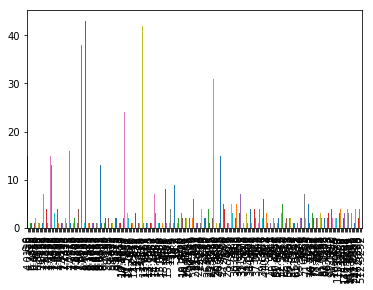

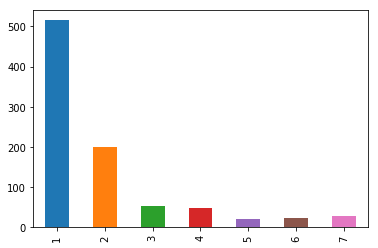

In [162]:
df['Fare'].value_counts().sort_index().plot(kind='bar')
plt.show()
lstBins = [-1, 20, 40, 60, 80, 100, 150, 1000]
df['Fare'] = pd.cut(df['Fare'], bins = lstBins, labels = range(1, len(lstBins)))
df['Fare'].value_counts().sort_index().plot(kind='bar')

In [163]:
df['Name'] = df['Name'].str.split('[,.]').str[1]
names = list(df['Name'].unique())
print 'train, ' , names

dfTest['Name'] = dfTest['Name'].str.split('[,.]').str[1]
namesTest = list(dfTest['Name'].unique())
print 'test, ' , namesTest

train,  [' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme', ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt', ' the Countess', ' Jonkheer']
test,  [' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr', ' Dona']


In [164]:
dNamesMap = {}
diffNames = list(set(names + namesTest))
for n in diffNames:
    if n in [' Miss', ' Mrs', ' Mr', ' Ms']:
        dNamesMap[n] = 1
    elif n in [' Mme', ' Mlle', ' Major', ' Col', ' Dr', ' Rev']:
        dNamesMap[n] = 2
    else:
        dNamesMap[n] = 3
        
df['Name'] = df['Name'].map(dNamesMap)
dfTest['Name'] = dfTest['Name'].map(dNamesMap)

In [165]:
#df['Age'].value_counts().sort_values().plot(kind='bar')
df['Age'] = df.groupby(['Parch', 'Name'])['Age'].apply(lambda x: x.fillna(x.median()))

In [166]:
df['Female'] = np.where(df['Sex'] == 'female', 1, 0)
df.drop(['Sex'], inplace = True, axis = 1)

In [167]:
quasConstVars = []
for col in df.columns:
    domVal = (df[col].value_counts() / float(len(df))).sort_values(ascending=False).values[0]
    print col, domVal
    if domVal > .9:
        quasConstVars.append(col)
quasConstVars

PassengerId 0.001122334455667789
Survived 0.6161616161616161
Pclass 0.5510662177328844
Name 0.9259259259259259
Age 0.19753086419753085
SibSp 0.6823793490460157
Parch 0.7609427609427609
Fare 0.5780022446689114
Cabin 0.7710437710437711
Embarked 0.7250280583613917
Female 0.6475869809203143


['Name']

In [168]:
df.drop(['Survived', 'PassengerId'] , axis = 1, inplace = True)

In [174]:
for col in df.columns:
    print col
    #plt.show()
    #df[col].value_counts().sort_index(ascending=True).plot(kind='bar')
    df[col].value_counts().sort_index(ascending=True)

Pclass


1    216
2    184
3    491
Name: Pclass, dtype: int64

Name


1    825
2     20
3     46
Name: Name, dtype: int64

Age


0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      9
4.00     11
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    35
22.00    27
23.00    15
         ..
44.00     9
45.00    12
45.50     2
46.00     3
47.00    10
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1
70.00     2
70.50     1
71.00     2
74.00     1
80.00     1
Name: Age, Length: 89, dtype: int64

SibSp


0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

Parch


0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

Fare


1    515
2    200
3     54
4     48
5     21
6     24
7     29
Name: Fare, dtype: int64

Cabin


0.000000      1
0.299854    687
0.466667     15
0.500000      4
0.593220     59
0.615385     13
0.744681     47
0.750000     32
0.757576     33
Name: Cabin, dtype: int64

Embarked


0.339009    646
0.389610     77
0.553571    168
Name: Embarked, dtype: int64

Female


0    577
1    314
Name: Female, dtype: int64

In [179]:
binAge = [-1] + [5*n for n in range(1,17)]
len(range(1,18))
len(binAge)
df['Age'] = pd.cut(df.Age, bins = binAge, labels = range(1,len(binAge)))

17

17

In [192]:
df.corr().abs().unstack()[df.corr().abs().unstack() > .5]

Pclass    Pclass      1.000000
          Cabin       0.697997
Name      Name        1.000000
SibSp     SibSp       1.000000
Parch     Parch       1.000000
Cabin     Pclass      0.697997
          Cabin       1.000000
Embarked  Embarked    1.000000
Female    Female      1.000000
dtype: float64

In [ ]:
nEst = range(1, 50)
mD = range(1, 50)
min_split = (2, 50)
param_grid = dict(max_depth = mD, min_samples_split = min_split, n_estimators = nEst)
grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv = 10, scoring = 'accuracy', verbose = 4)

grid.fit(df, target)
print grid.best_score_
print grid.best_params_


Fitting 10 folds for each of 4802 candidates, totalling 48020 fits
[CV] min_samples_split=2, n_estimators=1, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=1, max_depth=1, score=0.644444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=1, max_depth=1, score=0.644444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=1, max_depth=1, score=0.674157303371, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=1, max_depth=1, score=0.696629213483, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=1, max_depth=1, score=0.685393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=1, max_

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_split=2, n_estimators=2, max_depth=1, score=0.674157303371, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=1, score=0.696629213483, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=1, score=0.685393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=1, score=0.662921348315, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=1, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=1, score=0.696629213483, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=1 ................
[CV]  min_samples_spli

[CV]  min_samples_split=2, n_estimators=7, max_depth=1, score=0.707865168539, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=7, max_depth=1, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=7, max_depth=1, score=0.761363636364, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=1, score=0.7, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=1, score=0.7, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=1, score=0.685393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=1 ................
[CV]  min_samples_split=2, n_estimators=8, m

[CV]  min_samples_split=2, n_estimators=12, max_depth=1, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=12, max_depth=1, score=0.761363636364, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=1, score=0.733333333333, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=1, score=0.688888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=1, score=0.696629213483, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=1, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=1 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=17, max_depth=1, score=0.772727272727, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=1, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=1, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=1, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=1, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=1, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=1 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=23, max_depth=1, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=23, max_depth=1, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=23, max_depth=1, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=23, max_depth=1, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=23, max_depth=1, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=23, max_depth=1, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=1 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=28, max_depth=1, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=28, max_depth=1, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=28, max_depth=1, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=28, max_depth=1, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=28, max_depth=1, score=0.795454545455, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=1, score=0.7, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=1 ...............
[CV]  min_samples_split=2, 

[CV]  min_samples_split=2, n_estimators=33, max_depth=1, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=33, max_depth=1, score=0.707865168539, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=33, max_depth=1, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=33, max_depth=1, score=0.795454545455, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=1, score=0.722222222222, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=1, score=0.7, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=1 ...............
[CV]  min_samples_split=2, 

[CV]  min_samples_split=2, n_estimators=38, max_depth=1, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=38, max_depth=1, score=0.795454545455, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=1, score=0.688888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=1, score=0.7, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=1, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=1, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=1 ...............
[CV]  min_samples_split=2, 

[CV]  min_samples_split=2, n_estimators=44, max_depth=1, score=0.688888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=1, score=0.7, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=1, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=1, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=1, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=1, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=1 ...............
[CV]  min_samples_split=2, n

[CV]  min_samples_split=2, n_estimators=49, max_depth=1, score=0.711111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=1, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=1, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=1, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=1, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=1 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=1, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=1 ...............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=5, max_depth=1, score=0.662921348315, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=1 ...............
[CV]  min_samples_split=50, n_estimators=5, max_depth=1, score=0.719101123596, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=1 ...............
[CV]  min_samples_split=50, n_estimators=5, max_depth=1, score=0.685393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=1 ...............
[CV]  min_samples_split=50, n_estimators=5, max_depth=1, score=0.719101123596, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=1 ...............
[CV]  min_samples_split=50, n_estimators=5, max_depth=1, score=0.75, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=1 ...............
[CV]  min_samples_split=50, n_estimators=6, max_depth=1, score=0.633333333333, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=1 ...............
[CV]  min_samples_split=50

[CV]  min_samples_split=50, n_estimators=11, max_depth=1, score=0.7, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=1, score=0.7, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=1, score=0.685393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=1, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=1, score=0.719101123596, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=1, score=0.707865168539, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=1 ..............
[CV]  min_samples_split=50, n_es

[CV]  min_samples_split=50, n_estimators=16, max_depth=1, score=0.7, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=1, score=0.685393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=1, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=1, score=0.719101123596, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=1, score=0.707865168539, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=1, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=1 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=50, n_estimators=21, max_depth=1, score=0.685393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=1, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=1, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=1, score=0.707865168539, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=1, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=1, score=0.730337078652, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=1 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=26, max_depth=1, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=1, score=0.730337078652, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=1, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=1, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=1, score=0.741573033708, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=1, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=1 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=31, max_depth=1, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=1, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=1, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=1, score=0.741573033708, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=1, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=1, score=0.795454545455, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=1 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=36, max_depth=1, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=1, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=1, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=1, score=0.707865168539, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=1, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=1, score=0.795454545455, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=1 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=41, max_depth=1, score=0.730337078652, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=1, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=1, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=1, score=0.741573033708, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=1, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=1, score=0.795454545455, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=1 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=46, max_depth=1, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=1, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=1, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=1, score=0.719101123596, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=1, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=1 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=1, score=0.784090909091, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=1 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=2, max_depth=2, score=0.685393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=2 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=2, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=2 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=2, score=0.761363636364, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=2 ................
[CV]  min_samples_split=2, n_estimators=3, max_depth=2, score=0.666666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=2 ................
[CV]  min_samples_split=2, n_estimators=3, max_depth=2, score=0.666666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=2 ................
[CV]  min_samples_split=2, n_estimators=3, max_depth=2, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=2 ................
[CV]  min_samples_spli

[CV]  min_samples_split=2, n_estimators=7, max_depth=2, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=2 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=2, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=2 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=2, score=0.688888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=2 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=2, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=2 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=2, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=2 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=2, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=2 ................
[CV]  min_samples_split

[CV]  min_samples_split=2, n_estimators=13, max_depth=2, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=2, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=2, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=2, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=2, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=2, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=2 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=18, max_depth=2, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=2, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=2, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=2, score=0.795454545455, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=19, max_depth=2, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=19, max_depth=2, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=2 ...............
[CV]  min_samples_split=2, n

[CV]  min_samples_split=2, n_estimators=23, max_depth=2, score=0.818181818182, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=2, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=2, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=2, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=2, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=2, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=2 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=28, max_depth=2, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=2, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=2, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=2, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=2, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=2, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=2 ...............
[CV]  min_samples_

[CV]  min_samples_split=2, n_estimators=34, max_depth=2, score=0.822222222222, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=2, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=2, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=2, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=2, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=2, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=2 ...............
[CV]  min_samples_split=2, n

[CV]  min_samples_split=2, n_estimators=39, max_depth=2, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=2, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=2, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=2, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=2, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=2, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=2 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=44, max_depth=2, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=2, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=2, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=2, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=2, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=2, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=2 ...............
[CV]  min_samples_

[CV]  min_samples_split=2, n_estimators=49, max_depth=2, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=2, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=2, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=2, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=2 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=2, score=0.829545454545, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=2 ...............
[CV]  min_samples_split=50, n_estimators=1, max_depth=2, score=0.666666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=2 ...............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=6, max_depth=2, score=0.685393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=2 ...............
[CV]  min_samples_split=50, n_estimators=6, max_depth=2, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=2 ...............
[CV]  min_samples_split=50, n_estimators=6, max_depth=2, score=0.674157303371, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=2 ...............
[CV]  min_samples_split=50, n_estimators=6, max_depth=2, score=0.662921348315, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=2 ...............
[CV]  min_samples_split=50, n_estimators=6, max_depth=2, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=2 ...............
[CV]  min_samples_split=50, n_estimators=6, max_depth=2, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=2 ...............
[CV]  min_samples

[CV]  min_samples_split=50, n_estimators=11, max_depth=2, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=2, score=0.741573033708, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=2, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=2, score=0.829545454545, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=12, max_depth=2, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=12, max_depth=2, score=0.711111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=2 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=16, max_depth=2, score=0.829545454545, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=17, max_depth=2, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=17, max_depth=2, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=17, max_depth=2, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=17, max_depth=2, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=17, max_depth=2, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=2 ..............
[CV]  min_samples_spli

[CV]  min_samples_split=50, n_estimators=21, max_depth=2, score=0.829545454545, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=22, max_depth=2, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=22, max_depth=2, score=0.744444444444, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=22, max_depth=2, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=22, max_depth=2, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=22, max_depth=2, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=2 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=27, max_depth=2, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=27, max_depth=2, score=0.744444444444, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=27, max_depth=2, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=27, max_depth=2, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=27, max_depth=2, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=27, max_depth=2, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=2 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=32, max_depth=2, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=32, max_depth=2, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=32, max_depth=2, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=32, max_depth=2, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=32, max_depth=2, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=32, max_depth=2, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=2 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=37, max_depth=2, score=0.744444444444, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=37, max_depth=2, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=37, max_depth=2, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=37, max_depth=2, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=37, max_depth=2, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=37, max_depth=2, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=2 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=42, max_depth=2, score=0.733333333333, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=42, max_depth=2, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=42, max_depth=2, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=42, max_depth=2, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=42, max_depth=2, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=42, max_depth=2, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=2 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=47, max_depth=2, score=0.744444444444, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=47, max_depth=2, score=0.741573033708, total=   0.1s
[CV] min_samples_split=50, n_estimators=47, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=47, max_depth=2, score=0.85393258427, total=   0.1s
[CV] min_samples_split=50, n_estimators=47, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=47, max_depth=2, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=47, max_depth=2, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=2 ..............
[CV]  min_samples_split=50, n_estimators=47, max_depth=2, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=2 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=3, max_depth=3, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=3 ................
[CV]  min_samples_split=2, n_estimators=3, max_depth=3, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=3 ................
[CV]  min_samples_split=2, n_estimators=3, max_depth=3, score=0.852272727273, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=3 ................
[CV]  min_samples_split=2, n_estimators=4, max_depth=3, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=3 ................
[CV]  min_samples_split=2, n_estimators=4, max_depth=3, score=0.744444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=3 ................
[CV]  min_samples_split=2, n_estimators=4, max_depth=3, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=3 ................
[CV]  min_samples_spli

[CV] min_samples_split=2, n_estimators=9, max_depth=3 ................
[CV]  min_samples_split=2, n_estimators=9, max_depth=3, score=0.744444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=3 ................
[CV]  min_samples_split=2, n_estimators=9, max_depth=3, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=3 ................
[CV]  min_samples_split=2, n_estimators=9, max_depth=3, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=3 ................
[CV]  min_samples_split=2, n_estimators=9, max_depth=3, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=3 ................
[CV]  min_samples_split=2, n_estimators=9, max_depth=3, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=3 ................
[CV]  min_samples_split=2, n_estimators=9, max_depth=3, score=0.820224719101, total=   0.0s
[CV] min_samples_split=

[CV]  min_samples_split=2, n_estimators=14, max_depth=3, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=14, max_depth=3, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=14, max_depth=3, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=14, max_depth=3, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=14, max_depth=3, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=14, max_depth=3, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=3 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=19, max_depth=3, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=19, max_depth=3, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=19, max_depth=3, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=19, max_depth=3, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=19, max_depth=3, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=19, max_depth=3, score=0.875, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=3 ...............
[CV]  min_samples_split=2,

[CV]  min_samples_split=2, n_estimators=24, max_depth=3, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=3, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=3, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=3, score=0.863636363636, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=25, max_depth=3, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=25, max_depth=3, score=0.744444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=3 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=29, max_depth=3, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=3, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=3, score=0.863636363636, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=30, max_depth=3, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=30, max_depth=3, score=0.733333333333, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=30, max_depth=3, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=3 ...............
[CV]  min_samples_split=2, n_

[CV]  min_samples_split=2, n_estimators=34, max_depth=3, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=3, score=0.863636363636, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=35, max_depth=3, score=0.844444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=35, max_depth=3, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=35, max_depth=3, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=35, max_depth=3, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=3 ...............
[CV]  min_samples_

[CV]  min_samples_split=2, n_estimators=40, max_depth=3, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=40, max_depth=3, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=40, max_depth=3, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=40, max_depth=3, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=40, max_depth=3, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=40, max_depth=3, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=3 ...............
[CV]  min_samples_

[CV]  min_samples_split=2, n_estimators=45, max_depth=3, score=0.730337078652, total=   0.1s
[CV] min_samples_split=2, n_estimators=45, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=45, max_depth=3, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=45, max_depth=3, score=0.898876404494, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=45, max_depth=3, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=45, max_depth=3, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=3 ...............
[CV]  min_samples_split=2, n_estimators=45, max_depth=3, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=3 ...............
[CV]  min_samples

[CV]  min_samples_split=50, n_estimators=2, max_depth=3, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=3 ...............
[CV]  min_samples_split=50, n_estimators=2, max_depth=3, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=3 ...............
[CV]  min_samples_split=50, n_estimators=2, max_depth=3, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=3 ...............
[CV]  min_samples_split=50, n_estimators=2, max_depth=3, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=3 ...............
[CV]  min_samples_split=50, n_estimators=2, max_depth=3, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=3 ...............
[CV]  min_samples_split=50, n_estimators=2, max_depth=3, score=0.806818181818, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=3 ...............
[CV]  min_samples

[CV]  min_samples_split=50, n_estimators=7, max_depth=3, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=3 ...............
[CV]  min_samples_split=50, n_estimators=7, max_depth=3, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=3 ...............
[CV]  min_samples_split=50, n_estimators=7, max_depth=3, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=3 ...............
[CV]  min_samples_split=50, n_estimators=7, max_depth=3, score=0.829545454545, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=3 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=3, score=0.7, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=3 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=3, score=0.688888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=3 ...............
[CV]  min_samples_split=50,

[CV]  min_samples_split=50, n_estimators=13, max_depth=3, score=0.722222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=13, max_depth=3, score=0.741573033708, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=13, max_depth=3, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=13, max_depth=3, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=13, max_depth=3, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=13, max_depth=3, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=3 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=18, max_depth=3, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=18, max_depth=3, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=18, max_depth=3, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=18, max_depth=3, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=18, max_depth=3, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=18, max_depth=3, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=3 ..............
[CV]  min_sam

[CV]  min_samples_split=50, n_estimators=23, max_depth=3, score=0.85393258427, total=   0.1s
[CV] min_samples_split=50, n_estimators=23, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=23, max_depth=3, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=23, max_depth=3, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=23, max_depth=3, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=23, max_depth=3, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=23, max_depth=3, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=3 ..............
[CV]  min_sam

[CV]  min_samples_split=50, n_estimators=28, max_depth=3, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=28, max_depth=3, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=28, max_depth=3, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=28, max_depth=3, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=28, max_depth=3, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=3, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=3 ..............
[CV]  min_samples_spli

[CV]  min_samples_split=50, n_estimators=33, max_depth=3, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=33, max_depth=3, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=33, max_depth=3, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=33, max_depth=3, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=3, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=3, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=3 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=38, max_depth=3, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=38, max_depth=3, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=38, max_depth=3, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=38, max_depth=3, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=3, score=0.833333333333, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=3, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=3 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=43, max_depth=3, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=43, max_depth=3, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=43, max_depth=3, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=3, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=3, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=3, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=3 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=48, max_depth=3, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=48, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=48, max_depth=3, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=48, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=48, max_depth=3, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=3, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=3, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=3 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=3, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=3 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=5, max_depth=4, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=4 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=4, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=4 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=4, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=4 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=4, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=4 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=4, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=4 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=4, score=0.875, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=4 ................
[CV]  min_samples_split=2, n_est

[CV] min_samples_split=2, n_estimators=10, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=10, max_depth=4, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=10, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=10, max_depth=4, score=0.875, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=4, score=0.833333333333, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=4, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=4, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimator

[CV]  min_samples_split=2, n_estimators=15, max_depth=4, score=0.875, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=4, score=0.844444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=4, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=4, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=4, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=4 ...............
[CV]  min_samples_split=2,

[CV]  min_samples_split=2, n_estimators=21, max_depth=4, score=0.855555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=4, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=4, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=4, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=4, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=4 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=26, max_depth=4, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=4, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=4, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=4, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=4, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=4 ...............
[CV]  min_samples

[CV] min_samples_split=2, n_estimators=31, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=4, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=4, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=4, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=4, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=4, score=0.865168539326, total=   0.0s
[CV] min_samples_s

[CV]  min_samples_split=2, n_estimators=36, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=4, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=4, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=4, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=4, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=4, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=4 ...............
[CV]  min_samples_

[CV]  min_samples_split=2, n_estimators=41, max_depth=4, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=41, max_depth=4, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=41, max_depth=4, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=41, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=41, max_depth=4, score=0.875, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=42, max_depth=4, score=0.844444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=4 ...............
[CV]  min_samples_split=2, 

[CV]  min_samples_split=2, n_estimators=46, max_depth=4, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=46, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=46, max_depth=4, score=0.886363636364, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=47, max_depth=4, score=0.844444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=47, max_depth=4, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=4 ...............
[CV]  min_samples_split=2, n_estimators=47, max_depth=4, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=4 ...............
[CV]  min_samples_split=2, n_

[CV]  min_samples_split=50, n_estimators=2, max_depth=4, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=4 ...............
[CV]  min_samples_split=50, n_estimators=2, max_depth=4, score=0.829545454545, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=4 ...............
[CV]  min_samples_split=50, n_estimators=3, max_depth=4, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=4 ...............
[CV]  min_samples_split=50, n_estimators=3, max_depth=4, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=4 ...............
[CV]  min_samples_split=50, n_estimators=3, max_depth=4, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=4 ...............
[CV]  min_samples_split=50, n_estimators=3, max_depth=4, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=4 ...............
[CV]  min_samples_split=50,

[CV]  min_samples_split=50, n_estimators=8, max_depth=4, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=4 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=4, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=4 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=4, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=4 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=4, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=4 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=4, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=4 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=4, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=4 ...............
[CV]  min_samples_split=50,

[CV]  min_samples_split=50, n_estimators=13, max_depth=4, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=13, max_depth=4, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=13, max_depth=4, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=13, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=13, max_depth=4, score=0.875, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=14, max_depth=4, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=4 ..............
[CV]  min_samples_split=50, n_es

[CV]  min_samples_split=50, n_estimators=18, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=18, max_depth=4, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=4, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=4, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=4, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=4, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=4 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=23, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=23, max_depth=4, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=24, max_depth=4, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=24, max_depth=4, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=24, max_depth=4, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=24, max_depth=4, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=4 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=29, max_depth=4, score=0.811111111111, total=   0.1s
[CV] min_samples_split=50, n_estimators=29, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=4, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=4, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=4, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=4, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=4 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=34, max_depth=4, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=4, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=4, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=4, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=4, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=4 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=39, max_depth=4, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=4, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=4, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=4, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=4, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=4, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=4 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=44, max_depth=4, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=4, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=4, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=4, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=44, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=4, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=4, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=4 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=49, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=4, score=0.820224719101, total=   0.1s
[CV] min_samples_split=50, n_estimators=49, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=4, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=49, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=4, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=4 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=4, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=4 ..............
[CV]  min_samp

[CV]  min_samples_split=2, n_estimators=5, max_depth=5, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=5 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=5, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=5 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=5, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=5 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=5, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=5 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=5, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=5 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=5, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=5 ................
[CV]  min_samples_spli

[CV]  min_samples_split=2, n_estimators=10, max_depth=5, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=5, score=0.833333333333, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=5, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=5, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=5, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=5, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=5 ...............
[CV]  min_samples_split=2, n

[CV]  min_samples_split=2, n_estimators=16, max_depth=5, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=5, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=5, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=5, score=0.898876404494, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=5, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=5 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=21, max_depth=5, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=5, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=5, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=5, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=5 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=26, max_depth=5, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=5, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=5, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=5, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=5, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=5 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=31, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=5, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=5, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=5, score=0.852272727273, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=32, max_depth=5, score=0.822222222222, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=5 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=36, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=5, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=5, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=5, score=0.852272727273, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=37, max_depth=5, score=0.866666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=5 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=41, max_depth=5, score=0.831460674157, total=   0.1s
[CV] min_samples_split=2, n_estimators=41, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=41, max_depth=5, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=41, max_depth=5, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=41, max_depth=5, score=0.852272727273, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=42, max_depth=5, score=0.833333333333, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=42, max_depth=5, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=5 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=46, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=46, max_depth=5, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=46, max_depth=5, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=46, max_depth=5, score=0.852272727273, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=47, max_depth=5, score=0.833333333333, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=5 ...............
[CV]  min_samples_split=2, n_estimators=47, max_depth=5, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=5 ...............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=2, max_depth=5, score=0.741573033708, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=5 ...............
[CV]  min_samples_split=50, n_estimators=2, max_depth=5, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=5 ...............
[CV]  min_samples_split=50, n_estimators=2, max_depth=5, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=5 ...............
[CV]  min_samples_split=50, n_estimators=3, max_depth=5, score=0.688888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=5 ...............
[CV]  min_samples_split=50, n_estimators=3, max_depth=5, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=5 ...............
[CV]  min_samples_split=50, n_estimators=3, max_depth=5, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=5 ...............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=8, max_depth=5, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=5 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=5, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=5 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=5, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=5 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=5, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=5 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=5, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=5 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=5, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=5 ...............
[CV]  min_samples

[CV]  min_samples_split=50, n_estimators=13, max_depth=5, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=13, max_depth=5, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=13, max_depth=5, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=14, max_depth=5, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=14, max_depth=5, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=14, max_depth=5, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=5 ..............
[CV]  min_

[CV] min_samples_split=50, n_estimators=18, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=18, max_depth=5, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=18, max_depth=5, score=0.829545454545, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=5, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=5, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=5, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=

[CV]  min_samples_split=50, n_estimators=23, max_depth=5, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=23, max_depth=5, score=0.829545454545, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=24, max_depth=5, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=24, max_depth=5, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=24, max_depth=5, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=24, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=5 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=28, max_depth=5, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=5, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=5, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=5, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=5, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=5, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=5 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=34, max_depth=5, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=5, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=5, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=5, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=5, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=5, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=5 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=39, max_depth=5, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=5, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=5, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=5, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=5, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=5 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=44, max_depth=5, score=0.822222222222, total=   0.1s
[CV] min_samples_split=50, n_estimators=44, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=5, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=5, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=5, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=5, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=5 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=49, max_depth=5, score=0.833333333333, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=5, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=5, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=5, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=5, score=0.842696629213, total=   0.1s
[CV] min_samples_split=50, n_estimators=49, max_depth=5 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=5, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=5 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=5, max_depth=6, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=6 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=6, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=6 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=6, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=6 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=6, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=6 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=6, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=6 ................
[CV]  min_samples_split=2, n_estimators=5, max_depth=6, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=6 ................
[CV]  min_samples_spli

[CV]  min_samples_split=2, n_estimators=10, max_depth=6, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=10, max_depth=6, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=10, max_depth=6, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=10, max_depth=6, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=10, max_depth=6, score=0.863636363636, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=6, score=0.833333333333, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=6 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=15, max_depth=6, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=15, max_depth=6, score=0.852272727273, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=6, score=0.822222222222, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=6, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=6, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=6, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=6 ...............
[CV]  min_samples_split=2, 

[CV]  min_samples_split=2, n_estimators=21, max_depth=6, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=6, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=6, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=6, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=6, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=21, max_depth=6, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=6 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=26, max_depth=6, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=6, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=6, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=6, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=6, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=26, max_depth=6, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=6 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=31, max_depth=6, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=6, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=6, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=6, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=6, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=31, max_depth=6, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=6 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=36, max_depth=6, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=6, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=6, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=6, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=6, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=36, max_depth=6, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=6 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=41, max_depth=6, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=41, max_depth=6, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=41, max_depth=6, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=41, max_depth=6, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=41, max_depth=6, score=0.863636363636, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=42, max_depth=6, score=0.833333333333, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=6 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=46, max_depth=6, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=46, max_depth=6, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=46, max_depth=6, score=0.863636363636, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=47, max_depth=6, score=0.833333333333, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=47, max_depth=6, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=6 ...............
[CV]  min_samples_split=2, n_estimators=47, max_depth=6, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=6 ...............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=3, max_depth=6, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=6 ...............
[CV]  min_samples_split=50, n_estimators=3, max_depth=6, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=6 ...............
[CV]  min_samples_split=50, n_estimators=3, max_depth=6, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=6 ...............
[CV]  min_samples_split=50, n_estimators=3, max_depth=6, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=6 ...............
[CV]  min_samples_split=50, n_estimators=3, max_depth=6, score=0.795454545455, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=6 ...............
[CV]  min_samples_split=50, n_estimators=4, max_depth=6, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=6 ...............
[CV]  min_samples

[CV]  min_samples_split=50, n_estimators=8, max_depth=6, score=0.898876404494, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=6 ...............
[CV]  min_samples_split=50, n_estimators=8, max_depth=6, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=6 ...............
[CV]  min_samples_split=50, n_estimators=9, max_depth=6, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=6 ...............
[CV]  min_samples_split=50, n_estimators=9, max_depth=6, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=6 ...............
[CV]  min_samples_split=50, n_estimators=9, max_depth=6, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=6 ...............
[CV]  min_samples_split=50, n_estimators=9, max_depth=6, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=6 ...............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=14, max_depth=6, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=14, max_depth=6, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=14, max_depth=6, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=14, max_depth=6, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=14, max_depth=6, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=14, max_depth=6, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=6 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=19, max_depth=6, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=6, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=6, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=6, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=6, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=19, max_depth=6, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=6 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=24, max_depth=6, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=24, max_depth=6, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=24, max_depth=6, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=24, max_depth=6, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=24, max_depth=6, score=0.829545454545, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=25, max_depth=6, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=6 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=29, max_depth=6, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=6, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=29, max_depth=6, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=30, max_depth=6, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=30, max_depth=6, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=30, max_depth=6, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=6 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=34, max_depth=6, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=6, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=34, max_depth=6, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=35, max_depth=6, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=35, max_depth=6, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=35, max_depth=6, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=6 ..............
[CV]  min_samples_split

[CV]  min_samples_split=50, n_estimators=39, max_depth=6, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=6, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=39, max_depth=6, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=40, max_depth=6, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=40, max_depth=6, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=40, max_depth=6, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=6 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=44, max_depth=6, score=0.786516853933, total=   0.1s
[CV] min_samples_split=50, n_estimators=44, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=6, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=44, max_depth=6, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=45, max_depth=6, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=45, max_depth=6, score=0.766666666667, total=   0.1s
[CV] min_samples_split=50, n_estimators=45, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=45, max_depth=6, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=6 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=50, n_estimators=49, max_depth=6, score=0.775280898876, total=   0.1s
[CV] min_samples_split=50, n_estimators=49, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=6, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=6 ..............
[CV]  min_samples_split=50, n_estimators=49, max_depth=6, score=0.852272727273, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=7 ................
[CV]  min_samples_split=2, n_estimators=1, max_depth=7, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=7 ................
[CV]  min_samples_split=2, n_estimators=1, max_depth=7, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=7 ................
[CV]  min_samples_split=2, n_estimators=1, max_depth=7, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=7 ................
[CV]  min_samples_split=2, 

[CV]  min_samples_split=2, n_estimators=6, max_depth=7, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=7 ................
[CV]  min_samples_split=2, n_estimators=6, max_depth=7, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=7 ................
[CV]  min_samples_split=2, n_estimators=6, max_depth=7, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=7 ................
[CV]  min_samples_split=2, n_estimators=6, max_depth=7, score=0.898876404494, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=7 ................
[CV]  min_samples_split=2, n_estimators=6, max_depth=7, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=7 ................
[CV]  min_samples_split=2, n_estimators=6, max_depth=7, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=7 ................
[CV]  min_samples_spli

[CV]  min_samples_split=2, n_estimators=11, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=7, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=7, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=7, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=7, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=11, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=7 ...............
[CV]  min_samples_

[CV]  min_samples_split=2, n_estimators=16, max_depth=7, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=7, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=16, max_depth=7, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=17, max_depth=7, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=17, max_depth=7, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=17, max_depth=7, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=7 ...............
[CV]  min_samples_split=2, 

[CV]  min_samples_split=2, n_estimators=22, max_depth=7, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=22, max_depth=7, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=22, max_depth=7, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=22, max_depth=7, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=22, max_depth=7, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=22, max_depth=7, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=7 ...............
[CV]  min_samples_split=2, 

[CV]  min_samples_split=2, n_estimators=27, max_depth=7, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=27, max_depth=7, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=27, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=27, max_depth=7, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=27, max_depth=7, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=27, max_depth=7, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=7 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=32, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=32, max_depth=7, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=32, max_depth=7, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=32, max_depth=7, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=32, max_depth=7, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=32, max_depth=7, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=7 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=37, max_depth=7, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=37, max_depth=7, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=37, max_depth=7, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=37, max_depth=7, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=37, max_depth=7, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=37, max_depth=7, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=7 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=42, max_depth=7, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=42, max_depth=7, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=42, max_depth=7, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=42, max_depth=7, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=43, max_depth=7, score=0.822222222222, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=43, max_depth=7, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=7 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=47, max_depth=7, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=47, max_depth=7, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=48, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=48, max_depth=7, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=48, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=48, max_depth=7, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=48, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=48, max_depth=7, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=48, max_depth=7 ...............
[CV]  min_samples_split=2, n_estimators=48, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=48, max_depth=7 ...............
[CV]  min_samples

[CV]  min_samples_split=50, n_estimators=4, max_depth=7, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=7 ...............
[CV]  min_samples_split=50, n_estimators=4, max_depth=7, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=7 ...............
[CV]  min_samples_split=50, n_estimators=5, max_depth=7, score=0.833333333333, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=7 ...............
[CV]  min_samples_split=50, n_estimators=5, max_depth=7, score=0.744444444444, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=7 ...............
[CV]  min_samples_split=50, n_estimators=5, max_depth=7, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=7 ...............
[CV]  min_samples_split=50, n_estimators=5, max_depth=7, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=7 ...............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=10, max_depth=7, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=10, max_depth=7, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=10, max_depth=7, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=10, max_depth=7, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=10, max_depth=7, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=10, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=7 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=15, max_depth=7, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=15, max_depth=7, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=15, max_depth=7, score=0.76404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=15, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=15, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=15, max_depth=7, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=7, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=7 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=20, max_depth=7, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=20, max_depth=7, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=20, max_depth=7, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=7, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=7, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=7, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=7 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=25, max_depth=7, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=7, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=7, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=7, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=7, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=7 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=31, max_depth=7, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=7, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=7, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=7, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=7, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=7 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=36, max_depth=7, score=0.786516853933, total=   0.1s
[CV] min_samples_split=50, n_estimators=36, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=7, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=7, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=7, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=7, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=7 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=41, max_depth=7, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=7, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=7, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=7, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=7 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=46, max_depth=7, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=7, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=7, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=7, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=7, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=7 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=7, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=7 ..............
[CV]  min_s

[CV] min_samples_split=2, n_estimators=2, max_depth=8 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=8, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=8 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=8, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=8 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=8, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=8 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=8, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=8 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=8, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=8 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=8, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2

[CV] min_samples_split=2, n_estimators=7, max_depth=8 ................
[CV]  min_samples_split=2, n_estimators=7, max_depth=8, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=8 ................
[CV]  min_samples_split=2, n_estimators=7, max_depth=8, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=8 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=8, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=8 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=8, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=8 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=8, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=8 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=8, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2,

[CV]  min_samples_split=2, n_estimators=13, max_depth=8, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=8, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=8, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=8, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=8, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=8, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=8 ...............
[CV]  min_samples_split=2, n_

[CV]  min_samples_split=2, n_estimators=18, max_depth=8, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=8, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=8, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=8, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=8, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=8, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=8 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=23, max_depth=8, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=23, max_depth=8, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=23, max_depth=8, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=23, max_depth=8, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=23, max_depth=8, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=23, max_depth=8, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=8 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=28, max_depth=8, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=28, max_depth=8, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=28, max_depth=8, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=28, max_depth=8, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=28, max_depth=8, score=0.875, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=8, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=8 ...............
[CV]  min_samples_split=2

[CV]  min_samples_split=2, n_estimators=33, max_depth=8, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=33, max_depth=8, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=33, max_depth=8, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=33, max_depth=8, score=0.863636363636, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=8, score=0.822222222222, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=8, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=8 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=38, max_depth=8, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=38, max_depth=8, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=38, max_depth=8, score=0.863636363636, total=   0.1s
[CV] min_samples_split=2, n_estimators=39, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=8, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=8, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=8, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=8 ...............
[CV]  min_samples_split=2, 

[CV]  min_samples_split=2, n_estimators=43, max_depth=8, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=8, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=8, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=8, score=0.752808988764, total=   0.1s
[CV] min_samples_split=2, n_estimators=44, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=8, score=0.85393258427, total=   0.1s
[CV] min_samples_split=2, n_estimators=44, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=8, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=8 ...............
[CV]  min_samples_split=2, n

[CV]  min_samples_split=2, n_estimators=49, max_depth=8, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=8, score=0.755555555556, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=8, score=0.76404494382, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=8, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=8, score=0.876404494382, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=8 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=8, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=8 ...............
[CV]  min_samples_

[CV]  min_samples_split=50, n_estimators=5, max_depth=8, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=8 ...............
[CV]  min_samples_split=50, n_estimators=5, max_depth=8, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=8 ...............
[CV]  min_samples_split=50, n_estimators=5, max_depth=8, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=8 ...............
[CV]  min_samples_split=50, n_estimators=5, max_depth=8, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=8 ...............
[CV]  min_samples_split=50, n_estimators=5, max_depth=8, score=0.886363636364, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=8 ...............
[CV]  min_samples_split=50, n_estimators=6, max_depth=8, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=8 ...............
[CV]  min_samples

[CV]  min_samples_split=50, n_estimators=10, max_depth=8, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=10, max_depth=8, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=10, max_depth=8, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=8, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=8, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=8, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=8 ..............
[CV]  min_samples_spli

[CV]  min_samples_split=50, n_estimators=15, max_depth=8, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=15, max_depth=8, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=15, max_depth=8, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=8, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=8, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=8, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=8 ..............
[CV]  min_samples_spli

[CV]  min_samples_split=50, n_estimators=20, max_depth=8, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=20, max_depth=8, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=8, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=8, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=8, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=8, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=8 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=25, max_depth=8, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=8, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=8, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=8, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=8, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=8, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=8 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=30, max_depth=8, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=8, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=8, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=8, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=8, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=8, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=8 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=36, max_depth=8, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=8, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=8, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=8, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=8, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=8, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=8 ..............
[CV]  min_samples_spli

[CV]  min_samples_split=50, n_estimators=41, max_depth=8, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=8, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=8, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=8, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=8, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=8, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=8 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=46, max_depth=8, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=8, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=8, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=8, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=8, score=0.865168539326, total=   0.2s
[CV] min_samples_split=50, n_estimators=46, max_depth=8 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=8, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=8 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=2, n_estimators=2, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=9 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=9, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=9 ................
[CV]  min_samples_split=2, n_estimators=2, max_depth=9, score=0.806818181818, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=9 ................
[CV]  min_samples_split=2, n_estimators=3, max_depth=9, score=0.844444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=9 ................
[CV]  min_samples_split=2, n_estimators=3, max_depth=9, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=9 ................
[CV]  min_samples_split=2, n_estimators=3, max_depth=9, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=9 ................
[CV]  min_samples_split=2, n_esti

[CV]  min_samples_split=2, n_estimators=8, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=9 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=9, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=9 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=9 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=9, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=9 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=9, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=9 ................
[CV]  min_samples_split=2, n_estimators=8, max_depth=9, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=9 ................
[CV]  min_samples_spli

[CV] min_samples_split=2, n_estimators=13, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=9, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=13, max_depth=9, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=14, max_depth=9, score=0.822222222222, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=14, max_depth=9, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=14, max_depth=9, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=14, max_depth=9, score=0.820224719101, total=   0.0s
[CV] min_samples_s

[CV]  min_samples_split=2, n_estimators=18, max_depth=9, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=18, max_depth=9, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=19, max_depth=9, score=0.822222222222, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=19, max_depth=9, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=19, max_depth=9, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=19, max_depth=9, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=9 ...............
[CV]  min_samples_split=2, n

[CV]  min_samples_split=2, n_estimators=24, max_depth=9, score=0.833333333333, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=9, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=9, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=9, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=24, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=9 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=29, max_depth=9, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=9, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=9, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=29, max_depth=9, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=9 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=34, max_depth=9, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=9, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=9, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=9, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=9, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=34, max_depth=9, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=9 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=39, max_depth=9, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=9, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=9, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=9, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=39, max_depth=9, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=9 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=44, max_depth=9, score=0.842696629213, total=   0.1s
[CV] min_samples_split=2, n_estimators=44, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=9, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=9, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=9, score=0.876404494382, total=   0.1s
[CV] min_samples_split=2, n_estimators=44, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=44, max_depth=9, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=9 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=49, max_depth=9, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=9, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=9, score=0.775280898876, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=9, score=0.876404494382, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=9 ...............
[CV]  min_samples_split=2, n_estimators=49, max_depth=9, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=9 ...............
[CV]  min_samples_split=50, n_estimators=1, max_depth=9, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=9 ...............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=6, max_depth=9, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=9 ...............
[CV]  min_samples_split=50, n_estimators=6, max_depth=9, score=0.744444444444, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=9 ...............
[CV]  min_samples_split=50, n_estimators=6, max_depth=9, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=9 ...............
[CV]  min_samples_split=50, n_estimators=6, max_depth=9, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=9 ...............
[CV]  min_samples_split=50, n_estimators=6, max_depth=9, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=9 ...............
[CV]  min_samples_split=50, n_estimators=6, max_depth=9, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=9 ...............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=11, max_depth=9, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=9, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=9, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=9, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=9, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=11, max_depth=9, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=9 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=16, max_depth=9, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=9, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=9, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=9, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=9, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=16, max_depth=9, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=9 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=50, n_estimators=21, max_depth=9, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=9, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=9, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=9, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=9, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=21, max_depth=9, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=9 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=26, max_depth=9, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=9, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=9, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=9, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=26, max_depth=9, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=9 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=31, max_depth=9, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=9, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=9, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=9, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=31, max_depth=9, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=9 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=36, max_depth=9, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=9, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=9, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=36, max_depth=9, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=9 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=41, max_depth=9, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=9, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=9, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=41, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=9, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=41, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=9, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=41, max_depth=9, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=9 ..............
[CV]  min_sam

[CV]  min_samples_split=50, n_estimators=46, max_depth=9, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=9, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=9, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=9, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=9, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=9 ..............
[CV]  min_samples_split=50, n_estimators=46, max_depth=9, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=9 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=2, max_depth=10, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=10 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=10, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=10 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=10, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=10 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=10, score=0.886363636364, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=10 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=10, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=10 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=10, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=10 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=8, max_depth=10, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=10 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=10, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=10 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=10, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=10 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=10, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=10 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=10 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=10 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=13, max_depth=10, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=10, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=10, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=10, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=10, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=10 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=18, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=10, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=10, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=10, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=10, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=10, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=10 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=23, max_depth=10, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=10, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=10, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=10, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=10, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=10 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=28, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=10, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=10, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=10, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=10, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=10, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=10 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=33, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=10, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=10, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=10, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=10, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=10, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=10 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=38, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=10, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=10, score=0.898876404494, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=10, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=10, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=10, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=10 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=43, max_depth=10, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=10, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=10, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=10, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=10, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=10, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=10 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=48, max_depth=10, score=0.775280898876, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=10, score=0.898876404494, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=10, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=49, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=10, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=10, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=10 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=10, score=0.786516853933, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=10 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=5, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=10 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=10, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=10 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=10, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=10 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=10, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=10 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=10, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=10 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=10, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=10 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=10, max_depth=10, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=10, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=10, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=10, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=10, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=10 .............
[CV]

[CV]  min_samples_split=50, n_estimators=15, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=10, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=10, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=10, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=10, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=10 .............
[CV]

[CV]  min_samples_split=50, n_estimators=20, max_depth=10, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=10, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=10, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=10, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=10, score=0.833333333333, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=10, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=10 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=25, max_depth=10, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=10, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=10, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=10, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=10, score=0.833333333333, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=10, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=10 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=30, max_depth=10, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=30, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=10, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=10, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=10, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=10, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=10, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=10 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=35, max_depth=10, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=10, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=10, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=10, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=10, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=10, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=10 .............
[CV]

[CV]  min_samples_split=50, n_estimators=40, max_depth=10, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=10, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=10, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=10, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=10, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=10 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=45, max_depth=10, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=10, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=10, score=0.876404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=45, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=10, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=10, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=10 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=10, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=10 .............
[CV]

[CV]  min_samples_split=2, n_estimators=2, max_depth=11, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=11 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=11, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=11 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=11, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=11 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=11, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=11 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=11, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=11 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=11, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=11 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=8, max_depth=11, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=11 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=11, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=11 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=11, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=11 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=11, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=11 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=11, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=11 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=11, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=11 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=13, max_depth=11, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=11, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=11, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=11, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=11, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=11, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=11 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=18, max_depth=11, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=11, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=11, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=11, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=11, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=11, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=11 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=23, max_depth=11, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=11, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=11, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=11, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=11, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=11, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=11 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=28, max_depth=11, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=11, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=11, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=11, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=11, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=11, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=11 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=33, max_depth=11, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=11, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=11, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=11, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=11, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=11, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=11 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=38, max_depth=11, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=11, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=11, score=0.840909090909, total=   0.1s
[CV] min_samples_split=2, n_estimators=39, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=11, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=11, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=11, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=11 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=43, max_depth=11, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=11, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=11, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=11, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=11, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=44, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=11, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=11 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=48, max_depth=11, score=0.786516853933, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=11, score=0.865168539326, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=11, score=0.829545454545, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=11, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=11, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=11 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=11, score=0.76404494382, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=11 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=5, max_depth=11, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=11 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=11, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=11 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=11, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=11 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=11, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=11 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=11, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=11 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=11, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=11 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=10, max_depth=11, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=11, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=11, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=11, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=11, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=11, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=11 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=15, max_depth=11, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=11, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=11, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=11, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=11, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=11, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=11 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=20, max_depth=11, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=11, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=11, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=11, score=0.833333333333, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=11, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=11, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=11 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=25, max_depth=11, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=11, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=11, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=11, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=11, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=11, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=11 .............
[CV]

[CV]  min_samples_split=50, n_estimators=30, max_depth=11, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=11, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=11, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=11, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=11, score=0.842696629213, total=   0.1s
[CV] min_samples_split=50, n_estimators=31, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=11, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=11 .............
[CV]

[CV]  min_samples_split=50, n_estimators=35, max_depth=11, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=11, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=11, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=11, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=11, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=11, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=11 .............
[CV]  

[CV]  min_samples_split=50, n_estimators=40, max_depth=11, score=0.840909090909, total=   0.1s
[CV] min_samples_split=50, n_estimators=41, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=11, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=11, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=11, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=11, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=11, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=11 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=45, max_depth=11, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=11, score=0.811111111111, total=   0.1s
[CV] min_samples_split=50, n_estimators=46, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=11, score=0.777777777778, total=   0.1s
[CV] min_samples_split=50, n_estimators=46, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=11, score=0.797752808989, total=   0.1s
[CV] min_samples_split=50, n_estimators=46, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=11, score=0.85393258427, total=   0.1s
[CV] min_samples_split=50, n_estimators=46, max_depth=11 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=11, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=11 .............
[CV] 

[CV]  min_samples_split=2, n_estimators=2, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=12 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=12, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=12 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=12, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=12 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=12, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=12 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=12, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=12 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=12, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=12 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=7, max_depth=12, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=12 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=12, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=12 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=12, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=12 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=12, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=12 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=12, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=12 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=12 ...............
[CV]  min_samples_split=2, 

[CV]  min_samples_split=2, n_estimators=13, max_depth=12, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=12, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=12, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=12, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=12, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=12 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=18, max_depth=12, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=12, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=12, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=12, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=12, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=12, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=12 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=23, max_depth=12, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=12, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=12, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=12, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=12, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=12 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=28, max_depth=12, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=12, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=12, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=12, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=12 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=33, max_depth=12, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=12, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=12, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=12, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=12, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=12, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=12 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=38, max_depth=12, score=0.752808988764, total=   0.1s
[CV] min_samples_split=2, n_estimators=38, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=12, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=12, score=0.842696629213, total=   0.1s
[CV] min_samples_split=2, n_estimators=38, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=12, score=0.808988764045, total=   0.1s
[CV] min_samples_split=2, n_estimators=38, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=12, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=12 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=43, max_depth=12, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=43, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=12, score=0.842696629213, total=   0.1s
[CV] min_samples_split=2, n_estimators=43, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=12, score=0.808988764045, total=   0.1s
[CV] min_samples_split=2, n_estimators=43, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=12, score=0.808988764045, total=   0.1s
[CV] min_samples_split=2, n_estimators=43, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=12, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=12, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=12 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=48, max_depth=12, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=12, score=0.85393258427, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=12, score=0.808988764045, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=12, score=0.786516853933, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=12, score=0.775280898876, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=12 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=12, score=0.876404494382, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=12 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=4, max_depth=12, score=0.806818181818, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=12 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=12, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=12 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=12, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=12 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=12, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=12 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=12, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=12 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=12, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=12 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=10, max_depth=12, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=12, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=12, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=12, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=12, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=12 .............
[CV]

[CV]  min_samples_split=50, n_estimators=15, max_depth=12, score=0.775280898876, total=   0.1s
[CV] min_samples_split=50, n_estimators=15, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=12, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=12, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=12, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=12, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=12 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=20, max_depth=12, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=12, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=12, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=12, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=12, score=0.818181818182, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=12 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=25, max_depth=12, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=12, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=12, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=12, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=12, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=12, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=12 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=30, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=12, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=12, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=12, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=12, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=12, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=12 .............
[CV]

[CV]  min_samples_split=50, n_estimators=35, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=12, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=12, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=12, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=12, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=12, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=12 .............
[CV]

[CV]  min_samples_split=50, n_estimators=40, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=12, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=12, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=12, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=12, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=12, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=12 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=45, max_depth=12, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=12, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=12, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=12, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=12, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=12 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=12, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=12 .............
[CV]

[CV]  min_samples_split=2, n_estimators=2, max_depth=13, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=13 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=13, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=13 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=13, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=13 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=13, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=13 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=13, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=13 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=13, score=0.744444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=13 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=7, max_depth=13, score=0.806818181818, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=13 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=13, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=13 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=13, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=13 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=13, score=0.707865168539, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=13 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=13, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=13 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=13, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=13 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=13, max_depth=13, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=13, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=13, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=13, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=13, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=13, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=13 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=18, max_depth=13, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=13, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=13, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=13, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=13, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=13, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=13 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=23, max_depth=13, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=13, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=13, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=13, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=13, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=13, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=13 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=28, max_depth=13, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=13, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=13, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=13, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=13, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=13, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=13 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=33, max_depth=13, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=13, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=13, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=13, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=13, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=13, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=13 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=38, max_depth=13, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=13, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=13, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=13, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=13, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=13, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=13 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=43, max_depth=13, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=13, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=13, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=13, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=13, score=0.829545454545, total=   0.1s
[CV] min_samples_split=2, n_estimators=44, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=13, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=13 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=48, max_depth=13, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=13, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=48, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=13, score=0.797752808989, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=13, score=0.865168539326, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=13, score=0.829545454545, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=13 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=13, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=13 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=4, max_depth=13, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=13 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=13, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=13 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=13, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=13 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=13, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=13 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=13, score=0.875, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=13 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=13, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=13 ..............
[CV]  min_samples_split=50, n_

[CV]  min_samples_split=50, n_estimators=9, max_depth=13, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=13 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=13, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=13 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=13, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=13 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=13, score=0.806818181818, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=13, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=13, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=13 .............
[CV]  min_samples_s

[CV]  min_samples_split=50, n_estimators=14, max_depth=13, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=13, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=13, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=13, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=13, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=13, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=13 .............
[CV] 

[CV] min_samples_split=50, n_estimators=19, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=13, score=0.875, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=13, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=13, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=13, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=13, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=13, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50

[CV]  min_samples_split=50, n_estimators=25, max_depth=13, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=13, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=13, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=13, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=13, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=13, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=13 .............
[CV]  min_samples

[CV]  min_samples_split=50, n_estimators=30, max_depth=13, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=13, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=13, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=13, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=13, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=13, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=13 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=35, max_depth=13, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=13, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=13, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=13, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=13, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=13, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=13 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=40, max_depth=13, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=13, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=13, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=13, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=13, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=13, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=13 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=45, max_depth=13, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=13, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=13, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=13, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=13, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=45, max_depth=13 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=13, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=13 .............
[CV] 

[CV]  min_samples_split=2, n_estimators=2, max_depth=14, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=14 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=14, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=14 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=14, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=14 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=14, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=14 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=14, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=14 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=14, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=14 ...............
[CV]  min_samples_

[CV]  min_samples_split=2, n_estimators=7, max_depth=14, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=14 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=14, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=14 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=14, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=14 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=14, score=0.818181818182, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=14 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=14, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=14 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=14, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=14 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=12, max_depth=14, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=14, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=14, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=14, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=14, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=14, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=14 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=17, max_depth=14, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=14, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=14, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=14, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=14, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=14, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=14 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=22, max_depth=14, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=14, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=14, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=14, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=14, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=14, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=14 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=27, max_depth=14, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=14, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=14, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=14, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=14, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=14, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=14 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=33, max_depth=14, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=14, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=14, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=14, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=14, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=14, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=14 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=2, n_estimators=38, max_depth=14, score=0.8, total=   0.2s
[CV] min_samples_split=2, n_estimators=38, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=14, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=14, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=14, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=14, score=0.865168539326, total=   0.1s
[CV] min_samples_split=2, n_estimators=38, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=14, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=14 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=2, n_estimators=43, max_depth=14, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=14, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=14, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=14, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=14, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=14, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=14 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=48, max_depth=14, score=0.766666666667, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=14, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=48, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=14, score=0.808988764045, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=14, score=0.865168539326, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=14, score=0.808988764045, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=14 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=14, score=0.797752808989, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=14 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=4, max_depth=14, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=14 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=14, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=14 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=14, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=14 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=14, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=14 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=14, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=14 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=14, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=14 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=9, max_depth=14, score=0.829545454545, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=14, score=0.833333333333, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=14, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=14, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=14, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=14, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=14 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=15, max_depth=14, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=14, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=14, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=14, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=14, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=14, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=14 .............
[CV]

[CV]  min_samples_split=50, n_estimators=20, max_depth=14, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=14, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=14, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=14, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=14, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=14, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=14 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=25, max_depth=14, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=14, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=14, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=14, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=14, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=14, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=14 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=30, max_depth=14, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=14, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=14, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=14, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=14, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=14, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=14 .............
[CV]

[CV]  min_samples_split=50, n_estimators=35, max_depth=14, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=14, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=14, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=14, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=14, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=14, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=14 .............
[CV]

[CV]  min_samples_split=50, n_estimators=40, max_depth=14, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=14, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=14, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=14, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=14, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=14, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=14 .............
[CV]

[CV]  min_samples_split=50, n_estimators=45, max_depth=14, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=14, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=14, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=14, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=14, score=0.852272727273, total=   0.1s
[CV] min_samples_split=50, n_estimators=46, max_depth=14 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=14, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=14 .............
[CV]

[CV] min_samples_split=2, n_estimators=2, max_depth=15 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=15 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=15, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=15 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=15, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=15 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=15, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=15 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=15, score=0.898876404494, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=15 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=15, score=0.829545454545, total=   0.0s
[CV] min_samples

[CV]  min_samples_split=2, n_estimators=7, max_depth=15, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=15 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=15, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=15 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=15, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=15 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=15, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=15 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=15, score=0.818181818182, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=15 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=15, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=15 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=12, max_depth=15, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=15, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=15, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=15, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=15, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=15 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=18, max_depth=15, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=15, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=15, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=15, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=15, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=15, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=15 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=23, max_depth=15, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=15, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=15, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=15, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=15 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=28, max_depth=15, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=15, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=15, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=15, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=15, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=15, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=15 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=33, max_depth=15, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=15, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=15, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=15, score=0.797752808989, total=   0.1s
[CV] min_samples_split=2, n_estimators=33, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=15, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=15 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=38, max_depth=15, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=15, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=15, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=15, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=15 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=43, max_depth=15, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=15, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=15, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=15, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=15 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=48, max_depth=15, score=0.752808988764, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=15, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=48, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=15, score=0.85393258427, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=15, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=15, score=0.808988764045, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=15 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=15, score=0.797752808989, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=15 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=4, max_depth=15, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=15 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=15, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=15 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=15, score=0.744444444444, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=15 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=15, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=15 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=15, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=15 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=15, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=15 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=10, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=15, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=15, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=15, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=15, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=15, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=15 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=15, max_depth=15, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=15, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=15, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=15, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=15, score=0.833333333333, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=15, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=15 .............
[CV]

[CV]  min_samples_split=50, n_estimators=20, max_depth=15, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=15, score=0.844444444444, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=15, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=15, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=15, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=15 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=26, max_depth=15, score=0.833333333333, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=15, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=15, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=15, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=15, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=15, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=15 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=31, max_depth=15, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=15, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=15, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=15, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=15, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=15, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=15 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=36, max_depth=15, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=15, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=15, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=15, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=15, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=15, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=15 .............
[CV]

[CV]  min_samples_split=50, n_estimators=41, max_depth=15, score=0.822222222222, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=15, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=15, score=0.76404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=41, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=15, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=15, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=15 .............
[CV]  

[CV]  min_samples_split=50, n_estimators=46, max_depth=15, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=15, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=15, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=15, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=15, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=15 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=15, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=15 .............
[CV]

[CV] min_samples_split=2, n_estimators=2, max_depth=16 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=16, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=16 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=16, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=16 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=16, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=16 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=16, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=16 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=16, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=16 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=16, score=0.840909090909, total=   0.0s
[CV] min_samples_s

[CV]  min_samples_split=2, n_estimators=7, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=16 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=16, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=16 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=16, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=16 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=16, score=0.818181818182, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=16 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=16, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=16 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=16, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=16 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=12, max_depth=16, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=16, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=16, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=16, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=16, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=16 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=18, max_depth=16, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=16, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=16, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=16 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=23, max_depth=16, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=16, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=16, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=16, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=16 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=28, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=16, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=16, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=16 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=33, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=16, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=16, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=16, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=16 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=38, max_depth=16, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=16, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=16, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=16 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=43, max_depth=16, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=16, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=16, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=16 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=48, max_depth=16, score=0.85393258427, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=16, score=0.831460674157, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=16, score=0.808988764045, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=16, score=0.797752808989, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=16, score=0.887640449438, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=16 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=16, score=0.829545454545, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=16 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=4, max_depth=16, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=16 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=16, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=16 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=16, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=16 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=16, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=16 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=16, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=16 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=16, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=16 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=9, max_depth=16, score=0.806818181818, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=16, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=16, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=16, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=16, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=16 .............
[CV]  min_samples

[CV]  min_samples_split=50, n_estimators=15, max_depth=16, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=16, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=16, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=16, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=16, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=16 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=20, max_depth=16, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=16, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=16, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=16, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=16 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=25, max_depth=16, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=16, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=16, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=16 .............
[CV]  

[CV]  min_samples_split=50, n_estimators=30, max_depth=16, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=16, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=16, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=16, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=16, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=16 .............
[CV]

[CV]  min_samples_split=50, n_estimators=35, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=16, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=16, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=16, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=16, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=16, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=16 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=40, max_depth=16, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=16, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=16, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=16, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=16, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=16, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=16 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=45, max_depth=16, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=16, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=16, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=16, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=16, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=16 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=16, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=16 .............
[CV] 

[CV]  min_samples_split=2, n_estimators=2, max_depth=17, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=17 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=17, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=17 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=17, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=17 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=17, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=17 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=17, score=0.852272727273, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=17 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=17, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=17 ...............
[CV]  min_samples_split=2, 

[CV]  min_samples_split=2, n_estimators=7, max_depth=17, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=17 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=17, score=0.818181818182, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=17 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=17, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=17 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=17, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=17 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=17, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=17 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=17, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=17 ...............
[CV]  min_samples_split=2, n

[CV]  min_samples_split=2, n_estimators=13, max_depth=17, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=17, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=17, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=17, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=17, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=17, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=17 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=18, max_depth=17, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=17, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=17, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=17, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=17, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=17, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=17 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=23, max_depth=17, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=17, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=17, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=17, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=17, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=17, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=17 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=28, max_depth=17, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=17, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=17, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=17, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=17, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=17, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=17 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=33, max_depth=17, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=17, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=17, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=17, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=17, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=17, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=17 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=38, max_depth=17, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=17, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=17, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=17, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=17, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=17, score=0.744444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=17 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=43, max_depth=17, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=17, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=17, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=17, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=17, score=0.829545454545, total=   0.1s
[CV] min_samples_split=2, n_estimators=44, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=17, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=17 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=48, max_depth=17, score=0.808988764045, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=17, score=0.808988764045, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=17, score=0.786516853933, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=17, score=0.865168539326, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=17, score=0.829545454545, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=17 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=17, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=17 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=4, max_depth=17, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=17 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=17, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=17 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=17, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=17 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=17, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=17 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=17, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=17 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=17, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=17 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=9, max_depth=17, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=17 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=17, score=0.806818181818, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=17, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=17, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=17, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=17, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=17 .............
[CV]  min_samples

[CV]  min_samples_split=50, n_estimators=14, max_depth=17, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=17, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=17, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=17, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=17, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=17, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=17 .............
[CV]

[CV]  min_samples_split=50, n_estimators=19, max_depth=17, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=17, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=17, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=17, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=17, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=17, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=17 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=25, max_depth=17, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=17, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=17, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=17, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=17, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=17, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=17 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=30, max_depth=17, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=17, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=17, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=17, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=17, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=17, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=17 .............
[CV]  

[CV]  min_samples_split=50, n_estimators=35, max_depth=17, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=17, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=17, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=17, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=17, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=17, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=17 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=40, max_depth=17, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=17, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=17, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=17, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=17, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=40, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=17, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=17 .............
[CV]  

[CV]  min_samples_split=50, n_estimators=45, max_depth=17, score=0.775280898876, total=   0.1s
[CV] min_samples_split=50, n_estimators=45, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=17, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=17, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=17, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=17, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=17 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=17, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=17 .............
[CV]  

[CV]  min_samples_split=2, n_estimators=1, max_depth=18, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=18 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=18 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=18, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=18 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=18, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=18 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=18, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=18 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=18, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=18 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=6, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=18 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=18, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=18 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=18, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=18 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=18, score=0.818181818182, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=18 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=18, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=18 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=18, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=18 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=11, max_depth=18, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=18, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=18, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=18, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=18, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=18 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=17, max_depth=18, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=18, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=18, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=18, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=18 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=2, n_estimators=22, max_depth=18, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=18, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=18, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=18 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=27, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=18, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=18, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=18, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=18 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=32, max_depth=18, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=18, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=18, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=18, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=18 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=37, max_depth=18, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=18, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=18, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=18, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=18 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=42, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=18, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=18, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=18, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=18, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=18 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=47, max_depth=18, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=47, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=18, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=47, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=18, score=0.786516853933, total=   0.1s
[CV] min_samples_split=2, n_estimators=47, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=18, score=0.865168539326, total=   0.1s
[CV] min_samples_split=2, n_estimators=47, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=18, score=0.829545454545, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=18 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=18, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=18 ..............
[CV]  min_

[CV] min_samples_split=50, n_estimators=4, max_depth=18 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=18, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=18 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=18, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=18 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=18 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=18, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=18 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=18, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=18 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=18, score=0.863636363636, total=   0.0s
[CV] min_sam

[CV]  min_samples_split=50, n_estimators=9, max_depth=18, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=18 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=18 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=18, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=18 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=18, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=18 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=18, score=0.806818181818, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=18, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=18 .............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=14, max_depth=18, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=18, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=18, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=18, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=18, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=18, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=18 .............
[CV]

[CV]  min_samples_split=50, n_estimators=19, max_depth=18, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=18, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=18, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=18, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=18, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=18, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=18 .............
[CV]

[CV]  min_samples_split=50, n_estimators=25, max_depth=18, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=18, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=18, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=18, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=18, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=18 .............
[CV]

[CV]  min_samples_split=50, n_estimators=30, max_depth=18, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=18, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=18, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=18, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=18 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=35, max_depth=18, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=18, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=18, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=18, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=18 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=40, max_depth=18, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=18, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=18, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=18, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=18, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=18 .............
[CV]  

[CV]  min_samples_split=50, n_estimators=45, max_depth=18, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=18, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=18, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=18, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=18 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=18, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=18 .............
[CV]  

[CV]  min_samples_split=2, n_estimators=2, max_depth=19, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=19 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=19, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=19 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=19, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=19 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=19, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=19 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=19, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=19 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=19, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=19 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=7, max_depth=19, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=19 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=19, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=19 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=19, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=19 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=19, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=19 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=19, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=19 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=19, score=0.818181818182, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=19 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=12, max_depth=19, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=19, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=19, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=19, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=19, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=19, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=19 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=17, max_depth=19, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=19, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=19, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=19, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=19, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=19, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=19 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=22, max_depth=19, score=0.818181818182, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=19, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=19, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=19, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=19, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=19, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=19 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=28, max_depth=19, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=19, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=19, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=19, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=19, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=19, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=19 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=33, max_depth=19, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=19, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=19, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=19, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=19, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=19, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=19 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=38, max_depth=19, score=0.744444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=19, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=19, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=19, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=19, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=19, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=19 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=43, max_depth=19, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=19, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=19, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=19, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=19, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=19, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=19 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=48, max_depth=19, score=0.788888888889, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=19, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=19, score=0.741573033708, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=19, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=19, score=0.842696629213, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=19 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=19, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=19 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=4, max_depth=19, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=19 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=19, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=19 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=19, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=19 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=19, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=19 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=19, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=19 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=19, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=19 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=9, max_depth=19, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=19 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=19, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=19 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=19, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=19 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=19, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=19 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=19, score=0.806818181818, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=19, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=19 .............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=14, max_depth=19, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=19, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=19, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=19, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=19, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=19, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=19 .............
[CV]

[CV]  min_samples_split=50, n_estimators=19, max_depth=19, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=19, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=19, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=19, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=19, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=19, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=19 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=24, max_depth=19, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=19, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=19, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=19, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=19, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=19, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=19 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=30, max_depth=19, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=19, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=19, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=19, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=19, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=19, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=19 .............
[CV]

[CV]  min_samples_split=50, n_estimators=35, max_depth=19, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=19, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=19, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=19, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=19, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=19, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=19 .............
[CV]

[CV]  min_samples_split=50, n_estimators=40, max_depth=19, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=19, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=19, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=19, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=19, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=19, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=19 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=45, max_depth=19, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=19, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=19, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=19, score=0.876404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=45, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=19, score=0.820224719101, total=   0.1s
[CV] min_samples_split=50, n_estimators=45, max_depth=19 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=19, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=45, max_depth=19 .............
[CV] 

[CV]  min_samples_split=2, n_estimators=2, max_depth=20, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=20 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=20 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=20 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=20, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=20 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=20, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=20 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=20, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=20 ...............
[CV]  min_samples_

[CV]  min_samples_split=2, n_estimators=7, max_depth=20, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=20 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=20, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=20 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=20, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=20 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=20, score=0.806818181818, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=20 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=20, score=0.744444444444, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=20 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=20, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=20 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=12, max_depth=20, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=20, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=20, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=20, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=20, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=20, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=20 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=17, max_depth=20, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=20, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=20, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=20, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=20, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=20 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=22, max_depth=20, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=20, score=0.818181818182, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=20, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=20, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=20, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=20 ..............
[CV]  min_samples_split=2, n_est

[CV] min_samples_split=2, n_estimators=27, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=20, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=20, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=20, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=20, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=20, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=20, score=0.831460674157, total=   0.0s
[CV] min_s

[CV]  min_samples_split=2, n_estimators=33, max_depth=20, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=20, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=20, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=20, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=20 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=38, max_depth=20, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=20, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=20, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=20, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=20 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=43, max_depth=20, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=20, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=20, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=20, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=20 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=48, max_depth=20, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=20, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=20, score=0.741573033708, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=20, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=20, score=0.85393258427, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=20 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=20, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=20 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=4, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=20 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=20, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=20 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=20, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=20 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=20, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=20 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=20, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=20 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=20, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=20 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=9, max_depth=20, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=20 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=20, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=20 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=20, score=0.806818181818, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=20, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=20, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=20, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=20 .............
[CV]  min_samples_s

[CV]  min_samples_split=50, n_estimators=14, max_depth=20, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=20, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=20, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=20, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=20, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=20, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=20 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=19, max_depth=20, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=20, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=20, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=20, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=20, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=20, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=20 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=24, max_depth=20, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=20, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=20, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=20, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=20, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=20, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=20 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=29, max_depth=20, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=20, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=20, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=20, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=20, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=20, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=20 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=35, max_depth=20, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=20, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=20, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=20, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=20, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=20, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=20 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=40, max_depth=20, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=20, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=20, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=20, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=20, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=20 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=45, max_depth=20, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=20, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=20, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=20, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=20, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=20 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=20, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=20 .............
[CV] 

[CV]  min_samples_split=2, n_estimators=1, max_depth=21, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=21 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=21, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=21 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=21, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=21 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=21, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=21 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=21, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=21 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=21, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=21 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=6, max_depth=21, score=0.818181818182, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=21 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=21, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=21 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=21, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=21 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=21, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=21 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=21, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=21 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=21, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=21 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=12, max_depth=21, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=21, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=21, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=21, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=21, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=21, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=21 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=17, max_depth=21, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=21, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=21, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=21, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=21, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=21, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=21 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=22, max_depth=21, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=21, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=21, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=21, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=21, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=21, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=21 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=27, max_depth=21, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=21, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=21, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=21, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=21, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=21, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=21 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=32, max_depth=21, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=21, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=21, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=21, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=21, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=21, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=21 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=37, max_depth=21, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=21, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=21, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=21, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=21, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=21, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=21 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=42, max_depth=21, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=21, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=21, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=21, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=21, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=21, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=21 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=47, max_depth=21, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=47, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=21, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=21, score=0.876404494382, total=   0.1s
[CV] min_samples_split=2, n_estimators=47, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=21, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=48, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=21, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=21 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=21, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=21 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=4, max_depth=21, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=21 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=21, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=21 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=21, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=21 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=21, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=21 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=21, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=21 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=21, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=21 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=9, max_depth=21, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=21 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=21, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=21 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=21, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=21 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=21, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=21 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=21, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=21 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=21, score=0.806818181818, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=21 .............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=14, max_depth=21, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=21, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=21, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=21, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=21, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=21, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=21 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=19, max_depth=21, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=21, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=21, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=21, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=21, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=21, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=21 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=24, max_depth=21, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=21, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=21, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=21, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=21, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=21, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=21 .............
[CV]

[CV]  min_samples_split=50, n_estimators=29, max_depth=21, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=21, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=21, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=21, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=21, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=21, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=21 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=34, max_depth=21, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=21, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=21, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=21, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=21, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=21, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=21 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=39, max_depth=21, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=21, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=21, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=21, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=21, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=21, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=21 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=44, max_depth=21, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=21, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=21, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=21, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=21, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=21 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=21, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=21 .............
[CV] 

[CV]  min_samples_split=2, n_estimators=1, max_depth=22, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=22 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=22, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=22 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=22, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=22 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=22, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=22 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=22, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=22 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=22, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=22 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=6, max_depth=22, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=22 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=22, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=22 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=22, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=22 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=22, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=22 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=22, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=22 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=22, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=22 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=11, max_depth=22, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=11, max_depth=22, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=11, max_depth=22, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=11, max_depth=22, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=22, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=22, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=22 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=16, max_depth=22, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=16, max_depth=22, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=16, max_depth=22, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=16, max_depth=22, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=22, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=22, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=22 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=21, max_depth=22, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=22, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=22, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=22, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=22, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=22, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=22 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=26, max_depth=22, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=22, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=22, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=22, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=22, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=22, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=22 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=32, max_depth=22, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=22, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=22, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=22, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=22, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=22, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=22 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=37, max_depth=22, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=22, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=22, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=22, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=22, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=22, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=22 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=42, max_depth=22, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=22, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=22, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=22, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=22, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=22, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=22 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=47, max_depth=22, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=47, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=22, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=22, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=22, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=22, score=0.85393258427, total=   0.1s
[CV] min_samples_split=2, n_estimators=47, max_depth=22 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=22, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=47, max_depth=22 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=3, max_depth=22, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=22 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=22, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=22 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=22, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=22 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=22, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=22 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=22, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=22 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=22, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=22 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=8, max_depth=22, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=22 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=22, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=22 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=22, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=22 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=22, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=22 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=22, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=22 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=22, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=22 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=14, max_depth=22, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=22, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=22, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=22, score=0.797752808989, total=   0.1s
[CV] min_samples_split=50, n_estimators=14, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=22, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=22, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=22 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=19, max_depth=22, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=22, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=22, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=22, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=22, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=22, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=22 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=24, max_depth=22, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=22, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=22, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=22, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=22, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=22, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=22 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=29, max_depth=22, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=22, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=22, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=22, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=22, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=22, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=22 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=34, max_depth=22, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=34, max_depth=22, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=22, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=22, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=22, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=22, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=22 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=39, max_depth=22, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=39, max_depth=22, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=22, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=22, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=22, score=0.76404494382, total=   0.2s
[CV] min_samples_split=50, n_estimators=40, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=22, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=22 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=44, max_depth=22, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=44, max_depth=22, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=22, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=22, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=22, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=22, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=22 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=49, max_depth=22, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=22 .............
[CV]  min_samples_split=50, n_estimators=49, max_depth=22, score=0.852272727273, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=23 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=23, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=23 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=23, score=0.722222222222, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=23 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=23, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=23 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=23, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=23 ...............
[CV]  min_sa

[CV] min_samples_split=2, n_estimators=6, max_depth=23 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=23, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=23 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=23, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=23 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=23, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=23 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=23, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=23 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=23, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=23 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=23, score=0.797752808989, total=   0.0s
[CV] min_samples

[CV]  min_samples_split=2, n_estimators=11, max_depth=23, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=11, max_depth=23, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=11, max_depth=23, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=11, max_depth=23, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=11, max_depth=23, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=11, max_depth=23, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=11, max_depth=23 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=16, max_depth=23, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=16, max_depth=23, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=16, max_depth=23, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=16, max_depth=23, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=23, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=23, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=23 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=21, max_depth=23, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=23, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=23, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=23, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=23, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=23, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=23 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=26, max_depth=23, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=23, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=23, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=23, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=23, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=23, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=23 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=31, max_depth=23, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=31, max_depth=23, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=23, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=23, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=23, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=23, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=23 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=36, max_depth=23, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=36, max_depth=23, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=23, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=23, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=23, score=0.741573033708, total=   0.1s
[CV] min_samples_split=2, n_estimators=37, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=23, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=23 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=41, max_depth=23, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=41, max_depth=23, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=23, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=23, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=23, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=42, max_depth=23, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=42, max_depth=23 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=46, max_depth=23, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=46, max_depth=23, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=23, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=23, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=23, score=0.741573033708, total=   0.1s
[CV] min_samples_split=2, n_estimators=47, max_depth=23 ..............
[CV]  min_samples_split=2, n_estimators=47, max_depth=23, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=47, max_depth=23 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=3, max_depth=23, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=23 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=23, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=23 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=23, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=23 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=23, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=23 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=23, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=23 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=23, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=23 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=8, max_depth=23, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=23 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=23, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=23 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=23, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=23 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=23, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=23 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=23, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=23 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=23, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=23 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=14, max_depth=23, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=23, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=23, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=23, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=23, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=23, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=23 .............
[CV]

[CV]  min_samples_split=50, n_estimators=19, max_depth=23, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=23, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=23, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=23, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=23, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=23, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=23 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=24, max_depth=23, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=23, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=23, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=23, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=23, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=23, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=23 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=29, max_depth=23, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=23, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=23, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=23, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=23, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=23, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=23 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=34, max_depth=23, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=34, max_depth=23, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=34, max_depth=23, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=34, max_depth=23, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=34, max_depth=23, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=34, max_depth=23, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=23 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=39, max_depth=23, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=39, max_depth=23, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=39, max_depth=23, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=39, max_depth=23, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=39, max_depth=23, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=39, max_depth=23, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=23 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=44, max_depth=23, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=44, max_depth=23, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=44, max_depth=23, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=44, max_depth=23, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=44, max_depth=23, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=44, max_depth=23, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=23 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=49, max_depth=23, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=49, max_depth=23, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=49, max_depth=23, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=49, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=49, max_depth=23, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=49, max_depth=23, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=23 .............
[CV]  min_samples_split=50, n_estimators=49, max_depth=23, score=0.852272727273, total=   0.1s
[CV] min_samples_split=2, n_estimators=1, max_depth=24 ...............
[CV] 

[CV]  min_samples_split=2, n_estimators=5, max_depth=24, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=24 ...............
[CV]  min_samples_split=2, n_estimators=5, max_depth=24, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=24 ...............
[CV]  min_samples_split=2, n_estimators=5, max_depth=24, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=24 ...............
[CV]  min_samples_split=2, n_estimators=5, max_depth=24, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=24 ...............
[CV]  min_samples_split=2, n_estimators=5, max_depth=24, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=24 ...............
[CV]  min_samples_split=2, n_estimators=5, max_depth=24, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=24 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=10, max_depth=24, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=24, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=24, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=24, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=24, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=24, score=0.806818181818, total=   0.1s
[CV] min_samples_split=2, n_estimators=11, max_depth=24 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=15, max_depth=24, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=24, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=24, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=16, max_depth=24, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=16, max_depth=24, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=16, max_depth=24, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=24 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=2, n_estimators=20, max_depth=24, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=24, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=24, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=24, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=24, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=24, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=24 ..............
[CV]  min_samples_spli

[CV]  min_samples_split=2, n_estimators=26, max_depth=24, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=24, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=24, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=24, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=24, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=24, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=24 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=31, max_depth=24, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=31, max_depth=24, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=31, max_depth=24, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=31, max_depth=24, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=31, max_depth=24, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=31, max_depth=24, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=24 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=36, max_depth=24, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=36, max_depth=24, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=36, max_depth=24, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=36, max_depth=24, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=36, max_depth=24, score=0.85393258427, total=   0.1s
[CV] min_samples_split=2, n_estimators=36, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=36, max_depth=24, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=24 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=41, max_depth=24, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=41, max_depth=24, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=41, max_depth=24, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=41, max_depth=24, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=41, max_depth=24, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=41, max_depth=24, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=24 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=46, max_depth=24, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=46, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=46, max_depth=24, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=46, max_depth=24, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=46, max_depth=24, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=46, max_depth=24, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=46, max_depth=24 ..............
[CV]  min_samples_split=2, n_estimators=46, max_depth=24, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=24 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=3, max_depth=24, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=24 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=24, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=24 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=24, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=24 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=24, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=24 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=24, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=24 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=24, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=24 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=8, max_depth=24, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=24 ..............
[CV]  min_samples_split=50, n_estimators=8, max_depth=24, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=24 ..............
[CV]  min_samples_split=50, n_estimators=8, max_depth=24, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=24 ..............
[CV]  min_samples_split=50, n_estimators=8, max_depth=24, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=24 ..............
[CV]  min_samples_split=50, n_estimators=8, max_depth=24, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=24 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=24, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=24 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=13, max_depth=24, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=13, max_depth=24, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=13, max_depth=24, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=24, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=24, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=24, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=24 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=18, max_depth=24, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=24, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=24, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=24, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=24, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=24, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=24 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=24, max_depth=24, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=24, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=24, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=24, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=24, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=24, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=24 .............
[CV]

[CV]  min_samples_split=50, n_estimators=29, max_depth=24, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=24, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=24, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=24, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=24, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=29, max_depth=24, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=29, max_depth=24 .............
[CV]

[CV]  min_samples_split=50, n_estimators=34, max_depth=24, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=34, max_depth=24, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=34, max_depth=24, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=34, max_depth=24, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=34, max_depth=24, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=34, max_depth=24, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=34, max_depth=24 .............
[CV]

[CV]  min_samples_split=50, n_estimators=39, max_depth=24, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=39, max_depth=24, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=39, max_depth=24, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=39, max_depth=24, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=39, max_depth=24, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=39, max_depth=24, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=39, max_depth=24 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=44, max_depth=24, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=44, max_depth=24, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=44, max_depth=24, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=44, max_depth=24, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=44, max_depth=24, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=44, max_depth=24, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=44, max_depth=24 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=49, max_depth=24, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=49, max_depth=24, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=49, max_depth=24, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=49, max_depth=24, score=0.865168539326, total=   0.1s
[CV] min_samples_split=50, n_estimators=49, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=49, max_depth=24, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=49, max_depth=24 .............
[CV]  min_samples_split=50, n_estimators=49, max_depth=24, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=24 .............
[CV]  

[CV]  min_samples_split=2, n_estimators=5, max_depth=25, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=25 ...............
[CV]  min_samples_split=2, n_estimators=5, max_depth=25, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=25 ...............
[CV]  min_samples_split=2, n_estimators=5, max_depth=25, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=25 ...............
[CV]  min_samples_split=2, n_estimators=5, max_depth=25, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=25 ...............
[CV]  min_samples_split=2, n_estimators=5, max_depth=25, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=25 ...............
[CV]  min_samples_split=2, n_estimators=5, max_depth=25, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=25 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=10, max_depth=25, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=25, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=25, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=25, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=25, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=25, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=25 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=15, max_depth=25, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=25, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=25, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=25, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=16, max_depth=25, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=16, max_depth=25, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=16, max_depth=25 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=2, n_estimators=20, max_depth=25, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=25, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=25, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=25, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=25, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=21, max_depth=25, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=21, max_depth=25 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=2, n_estimators=25, max_depth=25, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=25, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=25, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=25, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=25, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=26, max_depth=25, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=26, max_depth=25 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=30, max_depth=25, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=31, max_depth=25, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=31, max_depth=25, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=31, max_depth=25, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=31, max_depth=25, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=31, max_depth=25, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=31, max_depth=25 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=36, max_depth=25, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=36, max_depth=25, score=0.755555555556, total=   0.1s
[CV] min_samples_split=2, n_estimators=36, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=36, max_depth=25, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=36, max_depth=25, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=36, max_depth=25, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=36, max_depth=25, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=36, max_depth=25 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=41, max_depth=25, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=41, max_depth=25, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=41, max_depth=25, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=41, max_depth=25, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=41, max_depth=25, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=41, max_depth=25, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=41, max_depth=25 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=46, max_depth=25, score=0.788888888889, total=   0.1s
[CV] min_samples_split=2, n_estimators=46, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=46, max_depth=25, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=46, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=46, max_depth=25, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=46, max_depth=25, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=46, max_depth=25, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=25 ..............
[CV]  min_samples_split=2, n_estimators=46, max_depth=25, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=46, max_depth=25 ..............
[CV]  min_s

[CV] min_samples_split=50, n_estimators=2, max_depth=25 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=25, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=25 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=25, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=25 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=25, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=25 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=25, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=25 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=25, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=25 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=25, score=0.752808988764, total=   0.0s
[CV] min_s

[CV]  min_samples_split=50, n_estimators=7, max_depth=25, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=25 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=25, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=25 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=25, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=25 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=25, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=25 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=25, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=25 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=25, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=25 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=12, max_depth=25, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=25, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=25, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=25, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=25, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=25, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=25 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=17, max_depth=25, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=25, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=25, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=25, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=25, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=25, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=25 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=22, max_depth=25, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=25, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=25, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=25, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=23, max_depth=25, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=23, max_depth=25, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=25 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=27, max_depth=25, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=25, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=25, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=25, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=25, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=25, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=25 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=32, max_depth=25, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=25, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=25, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=25, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=25, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=25, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=25 .............
[CV]  min_samples

[CV]  min_samples_split=50, n_estimators=37, max_depth=25, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=25, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=25, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=25, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=25, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=25, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=25 .............
[CV]  min_samples

[CV]  min_samples_split=50, n_estimators=42, max_depth=25, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=25, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=25, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=25, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=25, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=25, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=25 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=47, max_depth=25, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=48, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=25, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=48, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=25, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=48, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=25, score=0.76404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=48, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=25, score=0.85393258427, total=   0.1s
[CV] min_samples_split=50, n_estimators=48, max_depth=25 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=25, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=48, max_depth=25 .............
[CV]  

[CV] min_samples_split=2, n_estimators=4, max_depth=26 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=26, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=26 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=26, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=26 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=26, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=26 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=26, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=26 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=26, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=26 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=26, score=0.842696629213, total=   0.0s
[CV] min_samples

[CV]  min_samples_split=2, n_estimators=9, max_depth=26, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=26 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=26, score=0.806818181818, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=26, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=26, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=26, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=26, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=26 ..............
[CV]  min_sam

[CV]  min_samples_split=2, n_estimators=14, max_depth=26, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=26, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=26, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=26, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=26, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=26 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=2, n_estimators=19, max_depth=26, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=26, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=26, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=26, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=26, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=26, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=26 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=25, max_depth=26, score=0.788888888889, total=   0.1s
[CV] min_samples_split=2, n_estimators=25, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=26, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=26, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=26, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=26, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=26 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=30, max_depth=26, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=26, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=26, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=26, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=26 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=35, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=26, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=26, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=26, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=26 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=40, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=26, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=26, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=40, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=26, score=0.786516853933, total=   0.1s
[CV] min_samples_split=2, n_estimators=40, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=26, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=26 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=45, max_depth=26, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=45, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=26, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=26, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=26, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=26 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=26, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=26 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=2, max_depth=26, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=26 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=26, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=26 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=26, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=26 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=26, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=26 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=26, score=0.818181818182, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=26 ..............
[CV]  min_samples_split=50, n_estimators=3, max_depth=26, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=26 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=7, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=26 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=26, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=26 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=26, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=26 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=26, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=26 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=26, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=26 ..............
[CV]  min_samples_split=50, n_estimators=8, max_depth=26, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=26 ..............
[CV]  min_samples_spli

[CV]  min_samples_split=50, n_estimators=12, max_depth=26, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=26, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=13, max_depth=26, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=13, max_depth=26, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=13, max_depth=26, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=13, max_depth=26, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=26 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=17, max_depth=26, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=26, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=18, max_depth=26, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=18, max_depth=26, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=18, max_depth=26, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=18, max_depth=26, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=26 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=23, max_depth=26, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=23, max_depth=26, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=23, max_depth=26, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=23, max_depth=26, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=23, max_depth=26, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=23, max_depth=26, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=26 .............
[CV]

[CV]  min_samples_split=50, n_estimators=28, max_depth=26, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=26, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=26, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=26, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=26, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=26, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=26 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=33, max_depth=26, score=0.766666666667, total=   0.1s
[CV] min_samples_split=50, n_estimators=33, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=26, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=26, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=26, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=26, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=26, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=26 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=38, max_depth=26, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=26, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=26, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=26, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=26, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=26, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=26 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=43, max_depth=26, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=26, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=26, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=26, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=26, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=43, max_depth=26 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=48, max_depth=26, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=48, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=26, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=48, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=26, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=48, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=26, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=48, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=26, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=48, max_depth=26 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=26, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=48, max_depth=26 .............
[CV]  

[CV]  min_samples_split=2, n_estimators=4, max_depth=27, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=27 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=27, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=27 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=27, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=27 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=27, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=27 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=27, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=27 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=27, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=27 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=9, max_depth=27, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=27 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=27, score=0.806818181818, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=27, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=27, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=27, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=27, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=27 ..............
[CV]  min_sam

[CV]  min_samples_split=2, n_estimators=15, max_depth=27, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=27, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=27, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=27, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=27, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=27, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=27 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=20, max_depth=27, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=27, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=27, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=27, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=27, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=27, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=27 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=25, max_depth=27, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=27, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=27, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=27, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=27, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=27, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=27 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=30, max_depth=27, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=27, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=30, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=27, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=27, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=27, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=27, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=27 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=35, max_depth=27, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=27, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=27, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=27, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=27, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=27, score=0.865168539326, total=   0.1s
[CV] min_samples_split=2, n_estimators=35, max_depth=27 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=40, max_depth=27, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=27, score=0.85393258427, total=   0.1s
[CV] min_samples_split=2, n_estimators=40, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=27, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=27, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=27, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=27, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=27 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=45, max_depth=27, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=27, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=27, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=27, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=27, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=27 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=27, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=46, max_depth=27 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=2, max_depth=27, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=27 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=27, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=27 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=27, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=27 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=27, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=27 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=27, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=2, max_depth=27 ..............
[CV]  min_samples_split=50, n_estimators=2, max_depth=27, score=0.818181818182, total=   0.0s
[CV] min_samples_split=50, n_estimators=3, max_depth=27 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=7, max_depth=27, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=27 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=27, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=27 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=27, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=27 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=27, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=27 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=27, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=27 ..............
[CV]  min_samples_split=50, n_estimators=7, max_depth=27, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=8, max_depth=27 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=12, max_depth=27, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=27, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=27, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=13, max_depth=27, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=13, max_depth=27, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=13, max_depth=27, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=13, max_depth=27 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=17, max_depth=27, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=18, max_depth=27, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=18, max_depth=27, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=18, max_depth=27, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=18, max_depth=27, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=18, max_depth=27, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=18, max_depth=27 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=23, max_depth=27, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=23, max_depth=27, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=23, max_depth=27, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=23, max_depth=27, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=23, max_depth=27, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=23, max_depth=27, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=23, max_depth=27 .............
[CV]

[CV]  min_samples_split=50, n_estimators=28, max_depth=27, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=27, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=27, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=27, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=27, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=28, max_depth=27, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=28, max_depth=27 .............
[CV]  

[CV]  min_samples_split=50, n_estimators=33, max_depth=27, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=27, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=27, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=27, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=27, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=33, max_depth=27, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=33, max_depth=27 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=38, max_depth=27, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=27, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=27, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=27, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=27, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=38, max_depth=27, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=38, max_depth=27 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=43, max_depth=27, score=0.831460674157, total=   0.1s
[CV] min_samples_split=50, n_estimators=43, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=27, score=0.865168539326, total=   0.1s
[CV] min_samples_split=50, n_estimators=43, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=27, score=0.820224719101, total=   0.1s
[CV] min_samples_split=50, n_estimators=43, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=27, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=43, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=27, score=0.76404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=43, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=43, max_depth=27, score=0.876404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=43, max_depth=27 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=48, max_depth=27, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=48, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=27, score=0.820224719101, total=   0.1s
[CV] min_samples_split=50, n_estimators=48, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=27, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=48, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=27, score=0.76404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=48, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=27, score=0.876404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=48, max_depth=27 .............
[CV]  min_samples_split=50, n_estimators=48, max_depth=27, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=49, max_depth=27 .............
[CV] 

[CV]  min_samples_split=2, n_estimators=4, max_depth=28, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=28 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=28, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=28 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=28, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=28 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=28, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=28 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=28, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=28 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=28, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=5, max_depth=28 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=9, max_depth=28, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=28 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=28, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=28 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=28, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=28 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=28, score=0.806818181818, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=28, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=10, max_depth=28, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, max_depth=28 ..............
[CV]  min_sampl

[CV]  min_samples_split=2, n_estimators=14, max_depth=28, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=28, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=28, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=28, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=28, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=15, max_depth=28, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=28 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=2, n_estimators=19, max_depth=28, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=28, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=28, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=28, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=28, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=28, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=28 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=24, max_depth=28, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=28, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=28, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=28, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=28, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=28, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=28 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=29, max_depth=28, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=28, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=28, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=28, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=28, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=28, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=28 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=34, max_depth=28, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=28, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=28, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=28, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=28, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=28, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=28 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=39, max_depth=28, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=28, score=0.876404494382, total=   0.2s
[CV] min_samples_split=2, n_estimators=39, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=28, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=28, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=28, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=28, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=28 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=44, max_depth=28, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=28, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=28, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=28, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=45, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=28, score=0.741573033708, total=   0.1s
[CV] min_samples_split=2, n_estimators=45, max_depth=28 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=28, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=28 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=49, max_depth=28, score=0.829545454545, total=   0.2s
[CV] min_samples_split=50, n_estimators=1, max_depth=28 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=28, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=28 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=28, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=28 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=28, score=0.719101123596, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=28 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=28, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=28 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=28, score=0.719101123596, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=28 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=6, max_depth=28, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=28 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=28, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=28 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=28, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=28 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=28, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=28 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=28, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=28 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=28, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=28 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=11, max_depth=28, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=28, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=28, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=28, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=28, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=28, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=28 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=16, max_depth=28, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=28, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=28, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=28, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=28, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=28, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=28 .............
[CV]

[CV]  min_samples_split=50, n_estimators=21, max_depth=28, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=28, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=28, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=28, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=28, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=28, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=28 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=27, max_depth=28, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=28, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=28, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=28, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=28, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=28, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=28 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=32, max_depth=28, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=28, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=28, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=28, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=28, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=28, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=28 .............
[CV]

[CV]  min_samples_split=50, n_estimators=37, max_depth=28, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=28, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=28, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=28, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=28, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=28, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=28 .............
[CV]

[CV]  min_samples_split=50, n_estimators=42, max_depth=28, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=28, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=28, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=28, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=28, score=0.820224719101, total=   0.1s
[CV] min_samples_split=50, n_estimators=42, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=28, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=28 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=47, max_depth=28, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=28, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=28, score=0.85393258427, total=   0.1s
[CV] min_samples_split=50, n_estimators=47, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=28, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=28, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=28 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=28, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=28 .............
[CV] 

[CV]  min_samples_split=2, n_estimators=3, max_depth=29, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=29 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=29, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=29 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=29, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=29 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=29, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=29 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=29, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=29 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=29, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=29 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=9, max_depth=29, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=29 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=29, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=29 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=29, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=29 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=29, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=29 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=29, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=29 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=29, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=29 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=14, max_depth=29, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=29, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=29, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=29, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=29, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=29, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=29 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=19, max_depth=29, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=29, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=29, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=29, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=29, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=29, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=29 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=24, max_depth=29, score=0.786516853933, total=   0.1s
[CV] min_samples_split=2, n_estimators=24, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=29, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=29, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=29, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=29, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=29, score=0.788888888889, total=   0.1s
[CV] min_samples_split=2, n_estimators=25, max_depth=29 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=29, max_depth=29, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=29, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=29, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=29, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=29, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=29, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=29 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=34, max_depth=29, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=29, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=29, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=29, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=29, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=29, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=29 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=39, max_depth=29, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=29, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=29, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=29, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=29, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=40, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=29, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=29 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=44, max_depth=29, score=0.887640449438, total=   0.1s
[CV] min_samples_split=2, n_estimators=44, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=29, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=29, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=45, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=29, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=45, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=29, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=29, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=45, max_depth=29 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=49, max_depth=29, score=0.876404494382, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=29 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=29, score=0.829545454545, total=   0.1s
[CV] min_samples_split=50, n_estimators=1, max_depth=29 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=29, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=29 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=29, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=29 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=29, score=0.719101123596, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=29 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=29, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=29 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=6, max_depth=29, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=29 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=29, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=29 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=29, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=29 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=29, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=29 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=29, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=29 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=29, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=29 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=11, max_depth=29, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=29, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=29, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=29, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=29, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=29, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=29 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=16, max_depth=29, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=29, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=29, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=29, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=29, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=29, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=29 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=21, max_depth=29, score=0.76404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=21, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=29, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=29, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=29, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=29, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=29, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=29 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=26, max_depth=29, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=29, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=29, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=29, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=29, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=29, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=29 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=31, max_depth=29, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=29, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=29, score=0.8, total=   0.1s
[CV] min_samples_split=50, n_estimators=32, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=29, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=29, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=29, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=29 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=36, max_depth=29, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=29, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=29, score=0.777777777778, total=   0.1s
[CV] min_samples_split=50, n_estimators=37, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=29, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=29, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=29, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=29 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=41, max_depth=29, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=29, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=29, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=29, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=29, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=29, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=29 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=46, max_depth=29, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=29, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=29, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=29, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=29, score=0.85393258427, total=   0.1s
[CV] min_samples_split=50, n_estimators=47, max_depth=29 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=29, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=29 .............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=3, max_depth=30, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=30 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=30, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=30 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=30, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=30 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=30, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=30 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=30, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=30 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=30, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=30 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=8, max_depth=30, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=30 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=30, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=30 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=30, score=0.806818181818, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=30 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=30, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=30 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=30, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=30 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=30, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=30 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=13, max_depth=30, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=30, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=30, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=30, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=30, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=30, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=30 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=19, max_depth=30, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=30, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=30, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=30, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=30, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=30, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=30 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=24, max_depth=30, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=30, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=30, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=30, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=30, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=30, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=30 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=29, max_depth=30, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=30, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=30, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=30, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=30, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=30, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=30 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=34, max_depth=30, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=30, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=30, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=30, score=0.820224719101, total=   0.2s
[CV] min_samples_split=2, n_estimators=34, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=30, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=30, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=30 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=39, max_depth=30, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=30, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=30, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=30, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=30, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=30, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=30 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=44, max_depth=30, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=30, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=30, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=30, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=30, score=0.887640449438, total=   0.1s
[CV] min_samples_split=2, n_estimators=44, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=30, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=30 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=49, max_depth=30, score=0.842696629213, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=30, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=30, score=0.808988764045, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=30, score=0.786516853933, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=30, score=0.876404494382, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=30 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=30, score=0.829545454545, total=   0.1s
[CV] min_samples_split=50, n_estimators=1, max_depth=30 ..............
[CV]  min_

[CV] min_samples_split=50, n_estimators=6, max_depth=30 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=30, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=30 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=30, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=30 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=30, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=30 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=30, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=30 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=30, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=30 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=30, score=0.820224719101, total=   0.0s
[CV] min_sa

[CV]  min_samples_split=50, n_estimators=11, max_depth=30, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=30, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=30, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=30, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=30, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=30, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=30 .............
[CV]

[CV]  min_samples_split=50, n_estimators=16, max_depth=30, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=30, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=30, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=30, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=30, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=30, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=30 .............
[CV]  

[CV]  min_samples_split=50, n_estimators=21, max_depth=30, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=30, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=30, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=30, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=30, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=30, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=30 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=26, max_depth=30, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=30, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=30, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=30, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=30, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=30, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=30 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=31, max_depth=30, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=30, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=30, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=30, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=30, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=30, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=30 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=36, max_depth=30, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=30, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=30, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=30, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=30, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=30, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=30 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=41, max_depth=30, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=30, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=30, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=30, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=30, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=30, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=30 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=46, max_depth=30, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=30, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=30, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=30, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=30, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=30 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=30, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=30 .............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=3, max_depth=31, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=31 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=31, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=31 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=31, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=31 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=31, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=31 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=31, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=31 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=31, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=31 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=9, max_depth=31, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=31 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=31, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=31 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=31, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=31 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=31, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=31 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=31, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=31 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=31, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=31 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=14, max_depth=31, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=31, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=31, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=31, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=31, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=31, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=15, max_depth=31 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=19, max_depth=31, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=31, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=31, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=31, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=31, score=0.811111111111, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=20, max_depth=31, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=31 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=24, max_depth=31, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=31, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=31, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=31, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=31, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=31, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=31 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=29, max_depth=31, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=31, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=31, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=31, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=31, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=31, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=31 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=35, max_depth=31, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=31, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=31, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=31, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=31, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=31, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=31 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=40, max_depth=31, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=31, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=31, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=31, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=31, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=31, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=31 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=45, max_depth=31, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=45, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=31, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=31, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=31, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=31, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=31 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=31, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=31 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=1, max_depth=31, score=0.719101123596, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=31 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=31, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=31 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=31, score=0.719101123596, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=31 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=31, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=31 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=31, score=0.752808988764, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=31 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=31, score=0.685393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=31 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=6, max_depth=31, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=31 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=31, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=31 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=31, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=31 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=31, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=31 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=31, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=31 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=31, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=7, max_depth=31 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=11, max_depth=31, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=31, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=31, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=31, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=31, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=12, max_depth=31, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=12, max_depth=31 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=16, max_depth=31, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=31, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=31, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=31, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=31, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=17, max_depth=31, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=17, max_depth=31 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=21, max_depth=31, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=31, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=31, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=31, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=31, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=22, max_depth=31, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=22, max_depth=31 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=26, max_depth=31, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=31, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=31, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=31, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=31, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=27, max_depth=31, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=27, max_depth=31 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=32, max_depth=31, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=31, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=31, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=31, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=31, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=32, max_depth=31, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=32, max_depth=31 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=37, max_depth=31, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=31, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=31, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=31, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=31, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=37, max_depth=31, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=37, max_depth=31 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=42, max_depth=31, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=31, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=31, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=31, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=31, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=42, max_depth=31, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=42, max_depth=31 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=47, max_depth=31, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=31, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=31, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=31, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=31, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=31 .............
[CV]  min_samples_split=50, n_estimators=47, max_depth=31, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=47, max_depth=31 .............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=3, max_depth=32, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=3, max_depth=32 ...............
[CV]  min_samples_split=2, n_estimators=3, max_depth=32, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=32 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=32, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=32 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=32, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=32 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=32, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=32 ...............
[CV]  min_samples_split=2, n_estimators=4, max_depth=32, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=4, max_depth=32 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=8, max_depth=32, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=32 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=32, score=0.806818181818, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=32 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=32, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=32 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=32, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=32 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=32, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=32 ...............
[CV]  min_samples_split=2, n_estimators=9, max_depth=32, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=9, max_depth=32 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=14, max_depth=32, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=32, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=32, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=32, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=32, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=14, max_depth=32, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=14, max_depth=32 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=19, max_depth=32, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=32, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=32, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=32, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=32, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=19, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=19, max_depth=32, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=20, max_depth=32 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=24, max_depth=32, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=32, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=32, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=32, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=24, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=24, max_depth=32, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=25, max_depth=32, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=25, max_depth=32 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=29, max_depth=32, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=32, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=32, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=29, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=29, max_depth=32, score=0.829545454545, total=   0.1s
[CV] min_samples_split=2, n_estimators=30, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=32, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=30, max_depth=32, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=30, max_depth=32 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=34, max_depth=32, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=32, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=34, max_depth=32, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=32, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=32, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=35, max_depth=32, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=35, max_depth=32 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=39, max_depth=32, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=32, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=39, max_depth=32, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=32, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=32, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=40, max_depth=32, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=40, max_depth=32 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=44, max_depth=32, score=0.786516853933, total=   0.1s
[CV] min_samples_split=2, n_estimators=44, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=32, score=0.887640449438, total=   0.1s
[CV] min_samples_split=2, n_estimators=44, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=44, max_depth=32, score=0.829545454545, total=   0.1s
[CV] min_samples_split=2, n_estimators=45, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=32, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=32, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=45, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=45, max_depth=32, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=45, max_depth=32 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=49, max_depth=32, score=0.876404494382, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=32 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=32, score=0.829545454545, total=   0.1s
[CV] min_samples_split=50, n_estimators=1, max_depth=32 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=32, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=32 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=32, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=32 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=32, score=0.719101123596, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=32 ..............
[CV]  min_samples_split=50, n_estimators=1, max_depth=32, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=1, max_depth=32 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=5, max_depth=32, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=32 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=32, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=32 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=32, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=32 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=32, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=32 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=32, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=32 ..............
[CV]  min_samples_split=50, n_estimators=6, max_depth=32, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=6, max_depth=32 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=11, max_depth=32, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=32, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=32, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=32, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=32, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=11, max_depth=32, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=11, max_depth=32 .............
[CV]

[CV]  min_samples_split=50, n_estimators=16, max_depth=32, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=32, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=32, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=32, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=32, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=16, max_depth=32, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=16, max_depth=32 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=21, max_depth=32, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=32, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=32, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=32, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=32, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=21, max_depth=32, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=21, max_depth=32 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=26, max_depth=32, score=0.775280898876, total=   0.1s
[CV] min_samples_split=50, n_estimators=26, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=32, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=32, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=32, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=32, score=0.797752808989, total=   0.1s
[CV] min_samples_split=50, n_estimators=26, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=26, max_depth=32, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=26, max_depth=32 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=31, max_depth=32, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=32, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=32, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=32, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=32, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=31, max_depth=32, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=32 .............
[CV]  

[CV]  min_samples_split=50, n_estimators=36, max_depth=32, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=32, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=32, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=32, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=32, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=32, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=32 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=41, max_depth=32, score=0.76404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=41, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=32, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=32, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=32, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=32, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=32, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=32 .............
[CV]  

[CV]  min_samples_split=50, n_estimators=46, max_depth=32, score=0.85393258427, total=   0.1s
[CV] min_samples_split=50, n_estimators=46, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=32, score=0.876404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=46, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=32, score=0.820224719101, total=   0.1s
[CV] min_samples_split=50, n_estimators=46, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=32, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=46, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=32, score=0.76404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=46, max_depth=32 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=32, score=0.876404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=46, max_depth=32 .............
[CV]  

[CV]  min_samples_split=2, n_estimators=2, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=33 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=33 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=33, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=33 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=33, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=33 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=33, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=33 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=33, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=33 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=7, max_depth=33, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=33 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=33, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=33 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=33, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=33 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=33, score=0.806818181818, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=33 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=33, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=33 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=33, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=33 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=12, max_depth=33, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=33, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=33, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=33, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=33, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=33, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=33 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=17, max_depth=33, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=33, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=33, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=33, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=33, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=33 ..............
[CV]  min_samples_spli

[CV]  min_samples_split=2, n_estimators=23, max_depth=33, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=33, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=33, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=33, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=33 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=2, n_estimators=28, max_depth=33, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=33, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=33, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=33, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=33, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=33 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=33, max_depth=33, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=33, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=33, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=33, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=33 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=38, max_depth=33, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=33, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=33, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=33, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=33 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=43, max_depth=33, score=0.741573033708, total=   0.1s
[CV] min_samples_split=2, n_estimators=43, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=33, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=33, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=43, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=33, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=33, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=33 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=48, max_depth=33, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=33, score=0.85393258427, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=33, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=33, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=33, score=0.786516853933, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=33 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=33, score=0.876404494382, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=33 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=4, max_depth=33, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=33 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=33, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=33 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=33 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=33, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=33 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=33, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=33 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=33, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=33 ..............
[CV]  min_sam

[CV]  min_samples_split=50, n_estimators=9, max_depth=33, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=33 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=33 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=33, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=33 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=33, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=33 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=33, score=0.806818181818, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=33, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=33 .............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=14, max_depth=33, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=33, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=33, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=33, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=33, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=33, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=33 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=19, max_depth=33, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=33, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=33, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=33, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=33, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=33, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=33 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=24, max_depth=33, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=24, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=33, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=33, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=33, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=33, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=33, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=33 .............
[CV]

[CV]  min_samples_split=50, n_estimators=30, max_depth=33, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=33, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=33, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=33, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=33, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=33, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=33 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=35, max_depth=33, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=33, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=33, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=33, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=33, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=33, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=33 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=40, max_depth=33, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=33, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=33, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=33, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=33, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=33 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=45, max_depth=33, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=33, score=0.777777777778, total=   0.2s
[CV] min_samples_split=50, n_estimators=45, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=33, score=0.775280898876, total=   0.1s
[CV] min_samples_split=50, n_estimators=45, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=33, score=0.85393258427, total=   0.2s
[CV] min_samples_split=50, n_estimators=45, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=33, score=0.876404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=45, max_depth=33 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=33, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=33 .............
[CV] 

[CV] min_samples_split=2, n_estimators=2, max_depth=34 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=34, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=34 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=34, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=34 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=34, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=34 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=34, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=34 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=34, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=34 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=34, score=0.797752808989, total=   0.0s
[CV] min_samples_

[CV]  min_samples_split=2, n_estimators=7, max_depth=34, score=0.806818181818, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=34 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=34, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=34 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=34, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=34 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=34, score=0.730337078652, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=34 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=34, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=34 ...............
[CV]  min_samples_split=2, n_estimators=8, max_depth=34, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=8, max_depth=34 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=13, max_depth=34, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=34, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=34, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=34, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=34, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=13, max_depth=34, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=13, max_depth=34 ..............
[CV]  min_s

[CV] min_samples_split=2, n_estimators=18, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=34, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=34, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=34, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=34, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=34, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=18, max_depth=34, score=0.865168539326, total=   0.0s
[CV] min_sa

[CV]  min_samples_split=2, n_estimators=23, max_depth=34, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=34, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=34, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=34, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=34, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=34, score=0.898876404494, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=34 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=28, max_depth=34, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=34, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=34, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=34, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=34, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=34, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=34 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=33, max_depth=34, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=34, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=34, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=34, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=34, score=0.865168539326, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=34, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=34, max_depth=34 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=38, max_depth=34, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=34, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=34, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=34, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=34, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=34, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=39, max_depth=34 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=43, max_depth=34, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=34, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=34, score=0.808988764045, total=   0.1s
[CV] min_samples_split=2, n_estimators=43, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=34, score=0.775280898876, total=   0.1s
[CV] min_samples_split=2, n_estimators=43, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=34, score=0.887640449438, total=   0.1s
[CV] min_samples_split=2, n_estimators=43, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=34, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=44, max_depth=34 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=48, max_depth=34, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=34, score=0.820224719101, total=   0.3s
[CV] min_samples_split=2, n_estimators=48, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=34, score=0.786516853933, total=   0.2s
[CV] min_samples_split=2, n_estimators=48, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=34, score=0.876404494382, total=   0.2s
[CV] min_samples_split=2, n_estimators=48, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=34, score=0.829545454545, total=   0.1s
[CV] min_samples_split=2, n_estimators=49, max_depth=34 ..............
[CV]  min_samples_split=2, n_estimators=49, max_depth=34, score=0.766666666667, total=   0.2s
[CV] min_samples_split=2, n_estimators=49, max_depth=34 ..............
[CV]  min_

[CV]  min_samples_split=50, n_estimators=4, max_depth=34, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=34 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=34, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=34 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=34, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=34 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=34, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=34 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=34, score=0.863636363636, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=34 ..............
[CV]  min_samples_split=50, n_estimators=5, max_depth=34, score=0.755555555556, total=   0.0s
[CV] min_samples_split=50, n_estimators=5, max_depth=34 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=9, max_depth=34, score=0.806818181818, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=34, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=34, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=34, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=34, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=10, max_depth=34, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=10, max_depth=34 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=15, max_depth=34, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=34, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=34, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=34, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=34, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=34, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=34 .............
[CV]

[CV]  min_samples_split=50, n_estimators=20, max_depth=34, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=34, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=34, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=34, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=34, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=34, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=34 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=25, max_depth=34, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=34, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=34, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=34, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=34, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=34, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=34 .............
[CV]  

[CV]  min_samples_split=50, n_estimators=30, max_depth=34, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=34, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=34, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=34, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=34, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=34, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=31, max_depth=34 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=35, max_depth=34, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=35, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=34, score=0.808988764045, total=   0.1s
[CV] min_samples_split=50, n_estimators=35, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=34, score=0.76404494382, total=   0.1s
[CV] min_samples_split=50, n_estimators=35, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=34, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=34, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=36, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=36, max_depth=34, score=0.8, total=   0.1s
[CV] min_samples_split=50, n_estimators=36, max_depth=34 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=40, max_depth=34, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=34, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=34, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=34, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=34, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=41, max_depth=34, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=41, max_depth=34 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=45, max_depth=34, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=34, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=34, score=0.852272727273, total=   0.1s
[CV] min_samples_split=50, n_estimators=46, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=34, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=34, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=34 .............
[CV]  min_samples_split=50, n_estimators=46, max_depth=34, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=46, max_depth=34 .............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=2, max_depth=35, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=35 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=35, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=35 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=35, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=35 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=35, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=35 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=35, score=0.76404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=35 ...............
[CV]  min_samples_split=2, n_estimators=2, max_depth=35, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=2, max_depth=35 ...............
[CV]  min_samples_

[CV]  min_samples_split=2, n_estimators=7, max_depth=35, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=35 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=35, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=35 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=35, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=35 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=35, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=35 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=35, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=35 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=35, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=35 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=12, max_depth=35, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=35, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=35, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=35, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=35, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=35, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=35 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=17, max_depth=35, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=35, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=35, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=35, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=35, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=35, score=0.840909090909, total=   0.0s
[CV] min_samples_split=2, n_estimators=18, max_depth=35 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=22, max_depth=35, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=35, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=35, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=35, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=35, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=23, max_depth=35, score=0.8, total=   0.0s
[CV] min_samples_split=2, n_estimators=23, max_depth=35 ..............
[CV]  min_samples_spl

[CV]  min_samples_split=2, n_estimators=27, max_depth=35, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=35, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=35, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=35, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=35, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=28, max_depth=35, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=28, max_depth=35 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=32, max_depth=35, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=35, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=35, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=35, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=35, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=33, max_depth=35, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=35 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=37, max_depth=35, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=35, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=35, score=0.766666666667, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=35, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=35, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=38, max_depth=35, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=38, max_depth=35 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=43, max_depth=35, score=0.777777777778, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=35, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=35, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=35, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=43, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=35, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=43, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=43, max_depth=35, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=43, max_depth=35 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=48, max_depth=35, score=0.777777777778, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=35, score=0.741573033708, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=35, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=35, score=0.85393258427, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=35, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=35 ..............
[CV]  min_samples_split=2, n_estimators=48, max_depth=35, score=0.820224719101, total=   0.1s
[CV] min_samples_split=2, n_estimators=48, max_depth=35 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=4, max_depth=35, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=35 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=35, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=35 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=35, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=35 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=35, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=35 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=35, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=35 ..............
[CV]  min_samples_split=50, n_estimators=4, max_depth=35, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=4, max_depth=35 ..............
[CV]  min_sa

[CV]  min_samples_split=50, n_estimators=9, max_depth=35, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=35 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=35, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=35 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=35, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=35 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=35, score=0.786516853933, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=35 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=35, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=35 ..............
[CV]  min_samples_split=50, n_estimators=9, max_depth=35, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=9, max_depth=35 ..............
[CV]  min_s

[CV]  min_samples_split=50, n_estimators=14, max_depth=35, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=35, score=0.797752808989, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=35, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=35, score=0.887640449438, total=   0.0s
[CV] min_samples_split=50, n_estimators=14, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=14, max_depth=35, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=15, max_depth=35, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=15, max_depth=35 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=19, max_depth=35, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=35, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=19, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=19, max_depth=35, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=35, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=35, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=20, max_depth=35, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=20, max_depth=35 .............
[CV]  min_sample

[CV]  min_samples_split=50, n_estimators=24, max_depth=35, score=0.865168539326, total=   0.1s
[CV] min_samples_split=50, n_estimators=24, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=24, max_depth=35, score=0.840909090909, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=35, score=0.811111111111, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=35, score=0.788888888889, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=35, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=25, max_depth=35, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=25, max_depth=35 .............
[CV]

[CV]  min_samples_split=50, n_estimators=29, max_depth=35, score=0.852272727273, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=35, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=35, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=35, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=35, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=30, max_depth=35, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=30, max_depth=35 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=35, max_depth=35, score=0.8, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=35, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=35, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=35, score=0.842696629213, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=35, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=35, max_depth=35, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=35, max_depth=35 .............
[CV]  min_sampl

[CV]  min_samples_split=50, n_estimators=40, max_depth=35, score=0.766666666667, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=35, score=0.76404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=35, score=0.831460674157, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=35, score=0.865168539326, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=35, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=40, max_depth=35, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=40, max_depth=35 .............
[CV] 

[CV]  min_samples_split=50, n_estimators=45, max_depth=35, score=0.777777777778, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=35, score=0.775280898876, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=35, score=0.85393258427, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=35, score=0.876404494382, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=35, score=0.820224719101, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=35 .............
[CV]  min_samples_split=50, n_estimators=45, max_depth=35, score=0.808988764045, total=   0.0s
[CV] min_samples_split=50, n_estimators=45, max_depth=35 .............
[CV] 

[CV]  min_samples_split=2, n_estimators=1, max_depth=36, score=0.752808988764, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=36 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=36, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=36 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=36, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=36 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=36, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=36 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=36, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=36 ...............
[CV]  min_samples_split=2, n_estimators=1, max_depth=36, score=0.775280898876, total=   0.0s
[CV] min_samples_split=2, n_estimators=1, max_depth=36 ...............
[CV]  min_sample

[CV]  min_samples_split=2, n_estimators=6, max_depth=36, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=6, max_depth=36 ...............
[CV]  min_samples_split=2, n_estimators=6, max_depth=36, score=0.818181818182, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=36 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=36, score=0.755555555556, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=36 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=36, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=36 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=36, score=0.741573033708, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=36 ...............
[CV]  min_samples_split=2, n_estimators=7, max_depth=36, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=7, max_depth=36 ...............
[CV]  min_samples

[CV]  min_samples_split=2, n_estimators=12, max_depth=36, score=0.788888888889, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=36, score=0.719101123596, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=36, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=36, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=36, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=12, max_depth=36, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=12, max_depth=36 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=17, max_depth=36, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=36, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=36, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=36, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=36, score=0.808988764045, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=17, max_depth=36, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=17, max_depth=36 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=22, max_depth=36, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=36, score=0.85393258427, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=36, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=36, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=36, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=22, max_depth=36, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=22, max_depth=36 ..............
[CV]  min_s

[CV]  min_samples_split=2, n_estimators=27, max_depth=36, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=36, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=36, score=0.831460674157, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=36, score=0.797752808989, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=36, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=27, max_depth=36, score=0.876404494382, total=   0.0s
[CV] min_samples_split=2, n_estimators=27, max_depth=36 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=32, max_depth=36, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=36, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=36, score=0.797752808989, total=   0.1s
[CV] min_samples_split=2, n_estimators=32, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=36, score=0.786516853933, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=36, score=0.887640449438, total=   0.0s
[CV] min_samples_split=2, n_estimators=32, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=32, max_depth=36, score=0.829545454545, total=   0.0s
[CV] min_samples_split=2, n_estimators=33, max_depth=36 ..............
[CV]  min_

[CV]  min_samples_split=2, n_estimators=37, max_depth=36, score=0.842696629213, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=36 ..............
[CV]  min_samples_split=2, n_estimators=37, max_depth=36, score=0.820224719101, total=   0.0s
[CV] min_samples_split=2, n_estimators=37, max_depth=36 ..............


In [ ]:
sol = ['adam', 'lbfgs']
act = ['identity', 'logistic', 'tanh', 'relu']
maxit = [200, 400]
hid = range(1, 6) + [x for x in it.product((1, 2, 3, 4),repeat=2)]
param_grid = dict(solver = sol, activation = act, max_iter = maxit, hidden_layer_sizes = hid)
grid = GridSearchCV(MLPClassifier(random_state=0), param_grid, cv = 10, scoring = 'accuracy', verbose = 4)

grid.fit(df, target)
print grid.best_score_
print grid.best_params_